# Table of contents
1. [Fit unsubtracted 30mK data](#30mk_unsub)
    * [Single fit](#30mK_single_fit)
    * [Loop fit all](#30mK_loop_fit_all)
    * [Export figures](#30mK_exportFig)
    * [Combine low and high [111] for 30mk and 20K](#30mK_combine_111)
        * [Fit with two pv peaks](#30mK_combine_111_fit2pks)
        * [Fit with subtracting locally fitted 20k data as bk](#30mK_combine_111_fit20Kbk)
        * [Fit with subtracting locally fitted 450mk/20k data as bk](#30mK_combine_111_loc_fit450mk20k)
    * [Global fit with Symfit](#30mk_symfit)
2. [Fit 30mK-450mK data](#fit_30mk-450mk)
    * [Loop fit all](#30mk-450k_loop_fit_all)
    * [Lmfit with constrain](#30mk-450mk_lmfit)
    * [Fit [22-1], [221] and average](#30mk-450mk_fit[221])
3. [Plot 30mk-20K I-E at Qs](#30mk-20k_plot)
4. [Cross cut I-Q at (111) at 0 and 0.07meV](#cross_cut111)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import fnmatch
from scipy.optimize import curve_fit
from lmfit.lineshapes import pvoigt # pvoigt(x, amplitude=1.0, center=0.0, sigma=1.0, fraction=0.5
#from symfit import parameters, variables, Model, Fit, exp
import matplotlib as mpl
%matplotlib ipympl
%matplotlib ipympl

# https://nipunbatra.github.io/blog/2014/latexify.html
from latexify import latexify

def format_axes(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)
    return ax

#mpl.rcParams.update(mpl.rcParamsDefault)
# plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
latexify()

In [13]:
def wrapper_fit_func_PV(x,N,*args):# varibale nb of PV functions 
    y = 0.0
    for i in range(N):
        y = y + pvoigt(x,*args[0][i*4:(i+1)*4])
    return y
def wrapper_fit_func_PV_constr(x,N,ratio,*args):# varibale nb of PV functions 
    y = 0.0
    for i in range(N):
        y = y + pvoigt(x,*args[0][i*4:(i+1)*4])
    return y

def streExp(x,s=1,a=1,b=1,c=0):
        return s*np.exp(-a* x**b)+c
def streExp(x,a=1,b=1,c=0):
        return np.exp(-a* x**b)+c
def fitReg(dat, *args):
    if len(args)==1:# when the low and high limits is in a list
        mask = (args[0][0]< dat[:,0]) & (dat[:,0] < args[0][1])
    else: # two augs give the the two limits
        mask = (args[0]< dat[:,0]) & (dat[:,0] < args[1])
    return dat[mask,:]

In [2]:
(8192/16)**(1/3)

7.999999999999999

# Fit un-subtracted 30mK data <a id='30mk_unsub'></a>

In [97]:
# data files with only 30mk data
fpath = r'D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/'
fname='ndzro_30mk_cut*.txt'

fnames=[] #index for different files
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        fnames.append(file)

# data files with all three T and subtrations: 30mk, 450mk, 20K, 30mk-20k, 450mk-20k, 30mk-450mk
fpath = r'D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/'
fname='I-E_3temps_unsub_sub_*_dq_0p2.txt'

fnames0=[] #index for different files
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        fnames0.append(file)
        
'''Be careful: the orders in the filename lists are the same.
   Next will plot the 20K data in the plots
'''

fpath = r'D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/'
fname='*unsub_sub_*_dq_0p1.txt'

fnames1=[] #index for different files
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        fnames1.append(file)

ndzro_30mk_cut@high[111]area_dq_0p1.txt
ndzro_30mk_cut@high[111]_dq_0p1.txt
ndzro_30mk_cut@low[111]area_dq_0p1.txt
ndzro_30mk_cut@low[111]_dq_0p1.txt
ndzro_30mk_cut@[111]_dq_0p1.txt
ndzro_30mk_cut@[22-1]_dq_0p1.txt
ndzro_30mk_cut@[220]_dq_0p1.txt
ndzro_30mk_cut@[221]_dq_0p1.txt
I-E_3temps_unsub_sub_Qhigh[111]area_dq_0p2.txt
I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
I-E_3temps_unsub_sub_Qlow[111]area_dq_0p2.txt
I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt
I-E_3temps_unsub_sub_Q[111]_dq_0p2.txt
I-E_3temps_unsub_sub_Q[22-1]_dq_0p2.txt
I-E_3temps_unsub_sub_Q[220]_dq_0p2.txt
I-E_3temps_unsub_sub_Q[221]_dq_0p2.txt
I-E_3temps_unsub_sub_Qhigh[111]area_dq_0p1.txt
I-E_3temps_unsub_sub_Qhigh[111]_dq_0p1.txt
I-E_3temps_unsub_sub_Qlow[111]area_dq_0p1.txt
I-E_3temps_unsub_sub_Qlow[111]_dq_0p1.txt
I-E_3temps_unsub_sub_Q[111]_dq_0p1.txt
I-E_3temps_unsub_sub_Q[22-1]_dq_0p1.txt
I-E_3temps_unsub_sub_Q[220]_dq_0p1.txt
I-E_3temps_unsub_sub_Q[221]_dq_0p1.txt


## Single fit <a id='30mK_single_fit'></a>

I-E_3temps_unsub_sub_Qhigh[111]_dq_0p1.txt
[-0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41 -0.4  -0.39
 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33 -0.32 -0.31 -0.3  -0.29 -0.28 -0.27
 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15
 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03
 -0.02 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09
  0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21
  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33
  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45
  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57
  0.58  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69
  0.7   0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81
  0.82  0.83  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93
  0.94  0.95  0.96  0.97  0.98  0.99  1.  ]


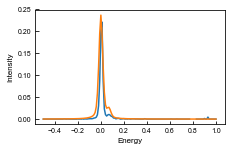

In [98]:
# plot data and guessed model
latexify()
#
fidx=1
print(fnames1[fidx])
f = os.path.join(fpath, fnames1[fidx])
dat = np.genfromtxt(f)
x, y, err = dat[:,0],dat[:,1], dat[:,2]
print(x)
plt.figure()
plt.plot(x,y)
p0 = [0.012,0,0.02,0.5, 0.001,0.07,0.02,0.5]
plt.plot(x, wrapper_fit_func_PV(x, 2, p0))
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.show()

In [25]:
# Fit single file for the gap
#%matplotlib inline
dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
dat = fitReg(dat,[-0.1,0.4])
x, y, err = dat[:,0],dat[:,1], dat[:,2]
lb = [0,    -0.05, 0.01, 0,  0,  0.05,0.01,0] # amplitude, pos, width, frac
hb = [np.inf,0.05, 0.05, 1,  0.1,0.09,0.05,1]

p0 = [0.025,0,0.03,0.5, 0.01,0.07,0.03,0.5]
p0 = [0.012,0,0.02,0.5, 0.001,0.07,0.02,0.5]
bounds = [lb, hb]
N = 2
popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
                       bounds=bounds, sigma=err, absolute_sigma=True,verbose=1)# if initio value is outside bounds, error
perr = np.sqrt(np.diag(pcov))
print(popt,'\n', perr)

fig, ax = plt.subplots(1,1)#, figsize=(5,4))
xfit=np.linspace(-0.2,0.5,700) 
ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white')
ax.plot(xfit,wrapper_fit_func_PV(xfit,N,popt))
for j in np.arange(N):
    ax.plot(xfit, pvoigt(xfit,*popt[j*4:(j+1)*4]),'--',lw=0.4)
    
ax.set_xlim([-0.2,0.4])
#ax.set_ylim([-0.005,0.035])

# Show pars in form of '1.2(1) K' (value(error))
Nerr = np.abs(np.floor(np.log10(abs(perr)))).astype(int) # get position of the first non-zero digit of the error
Rerr = [np.round(perr[i],decimals=Nerr[i]) for i in range(len(popt))] # round the error to have only one effective nb
Serr = np.array(Rerr).astype(str) # convert error to 
Serr = [np.int(Serr[i][-1]) for i in range(len(popt))] # get the last digit of the error

ax.text(0.5,0.8,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
         + '({:d}) meV'.format(Serr[1])
         +'\n'+
         r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
         + '({:d})'.format(Serr[5]), 
         transform=ax.transAxes,ha='left',va='bottom')
plt.show()    

`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 3.7318e+03, final cost 2.3240e+01, first-order optimality 3.96e-03.
[7.09268420e-03 4.98210457e-03 1.26235159e-02 3.42662357e-01
 4.88076192e-04 7.49044681e-02 2.07341310e-02 7.28110523e-01] 
 [1.20439672e-04 1.94385089e-04 2.40572600e-04 3.20417565e-02
 8.13890490e-05 3.05769001e-03 4.94682897e-03 3.74158050e-01]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Loop fit <a id='30mK_loop_fit_all'></a>

In [105]:
# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [0, -0.01, 0.01, 0],
      [0,  0.05, 0.01, 0],
      [0,  0.15, 0.01, 0],
      [0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.025, 1],
      [0.1,0.09, 0.025, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [0.012,0,   0.02,0.5],
      [0.001,0.07,0.02,0.5],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.03,0.5]])
%matplotlib ipympl
# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk ]

# Plot and fit
fig, axs = plt.subplots(2,4, figsize=(10,5),sharex=True,sharey=True)
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit
for i in [0,1,2,3,4,5,6,7]:
    ax = axs[i//4, np.remainder(i,4)]  
    
    # 1st: plot the 20K background
    f = os.path.join(fpath, fnames0[i]); print(fnames0[i])
    dat = np.genfromtxt(f)
    ax.errorbar(dat[:,6],dat[:,7],dat[:,8], fmt='o', ms=2, c='grey')
    
    # 2nd: fit and plot 30mk
    f = os.path.join(fpath, fnames[i]); print(fnames[i])
    dat = np.genfromtxt(f)
    dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
    dat0 = fitReg(dat,reg[i])
    x, y, err = dat0[:,0],dat0[:,1], dat0[:,2] #np.vsplit(fitReg(dat,reg[i]).T,3)[0:3]

    lb = lbs[id_pk[i],:].ravel()
    hb = hbs[id_pk[i],:].ravel()
    p0 = p0s[id_pk[i],:].ravel()

    bounds = [lb, hb]
    N = nb_pk[i]

    popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
                           bounds=bounds, sigma=err, absolute_sigma=True,verbose=0)# if initio value is outside bounds, error
    perr = np.sqrt(np.diag(pcov))
    #print popt,'\n', perr

    s = fnames[i]
    ax.set_title(s[s.find('@')+len('@'):s.rfind('.txt')])  
    ax.axhline(y=0, c='black', lw=0.5)
    
    ax.errorbar(dat[:,0],dat[:,1], dat[:,2], fmt='o', ms=2,  mfc='white', c='red')
    #ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white')
    #ax.plot(xfit,wrapper_fit_func_PV(xfit,N,popt))
    if N!=1:
        for j in np.arange(0,N):
            ax.plot(xfit, pvoigt(xfit,*popt[j*4:(j+1)*4]),'-',lw=0.4)
    else:
        ax.plot(xfit, pvoigt(xfit,*popt),'-',lw=0.4)
        
    ax.set_xlim([-0.2,0.4])
    ax.set_ylim([-0.002,0.2])

    # Show pars in form of '1.2(1) K' (value(error))
    Nerr = np.abs(np.floor(np.log10(abs(perr)))).astype(int) # get position of the first non-zero digit of the error
    Rerr = [np.round(perr[i],decimals=Nerr[i]) for i in range(len(popt))] # round the error to have only one effective nb
    Serr = np.array(Rerr).astype(str) # convert error to 
    Serr = [np.int(Serr[i][-1]) for i in range(len(popt))] # get the last digit of the error
    
    if N==2:
        ax.text(0.5,0.8,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1])
                +'\n'
                +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                + '({:d})'.format(Serr[5]), 
                transform=ax.transAxes,ha='left',va='bottom')
    elif N==3:
        ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1])
                +'\n'
                +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                + '({:d})'.format(Serr[5])
                +'\n'
                +r'$P3=$'+'{:{width}.{prec}f}'.format(popt[9],width=0,prec=Nerr[9])
                + '({:d})'.format(Serr[9]), 
                transform=ax.transAxes,ha='left',va='bottom')
    elif N==1:
        ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1]), 
                transform=ax.transAxes,ha='left',va='bottom')
plt.show()  

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

I-E_3temps_unsub_sub_Qhigh[111]area_dq_0p2.txt
ndzro_30mk_cut@high[111]area_dq_0p1.txt
I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
ndzro_30mk_cut@high[111]_dq_0p1.txt
I-E_3temps_unsub_sub_Qlow[111]area_dq_0p2.txt
ndzro_30mk_cut@low[111]area_dq_0p1.txt
I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt
ndzro_30mk_cut@low[111]_dq_0p1.txt
I-E_3temps_unsub_sub_Q[111]_dq_0p2.txt
ndzro_30mk_cut@[111]_dq_0p1.txt
I-E_3temps_unsub_sub_Q[22-1]_dq_0p2.txt
ndzro_30mk_cut@[22-1]_dq_0p1.txt
I-E_3temps_unsub_sub_Q[220]_dq_0p2.txt
ndzro_30mk_cut@[220]_dq_0p1.txt
I-E_3temps_unsub_sub_Q[221]_dq_0p2.txt
ndzro_30mk_cut@[221]_dq_0p1.txt


## Export figures  <a id='30mK_exportFig'></a>

ndzro_30mk_cut@high[111]area_dq_0p1.txt
[8.56693487e-03 4.92125965e-03 1.26370778e-02 2.94154087e-01
 6.90233818e-04 7.14141631e-02 2.50000000e-02 1.00000000e+00] 
 [1.49481878e-04 1.93826690e-04 2.30030572e-04 3.18622998e-02
 8.47139531e-05 2.93058388e-03 5.20702870e-03 2.46947186e-01]


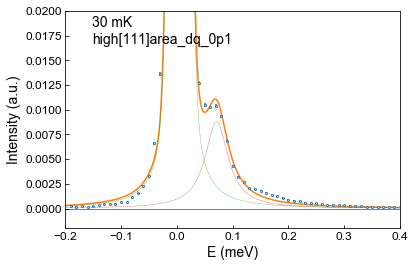

ndzro_30mk_cut@high[111]_dq_0p1.txt
[7.04575663e-03 4.96329794e-03 1.27352039e-02 3.14565483e-01
 5.02530090e-04 7.45808890e-02 2.18287460e-02 6.55887098e-01] 
 [1.37955246e-04 2.24537457e-04 2.69336503e-04 3.50980402e-02
 9.44336278e-05 3.53280907e-03 5.40685590e-03 4.05513776e-01]


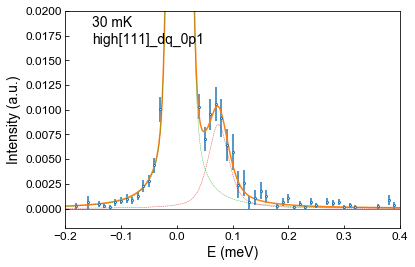

ndzro_30mk_cut@low[111]area_dq_0p1.txt
[5.79411158e-03 4.71172667e-03 1.26098076e-02 3.08174778e-01
 5.25084772e-04 7.09115325e-02 2.50000000e-02 1.00000000e+00] 
 [8.62419611e-05 1.63979347e-04 1.96316818e-04 2.75165632e-02
 5.52925065e-05 2.49241494e-03 4.42965629e-03 2.18341808e-01]


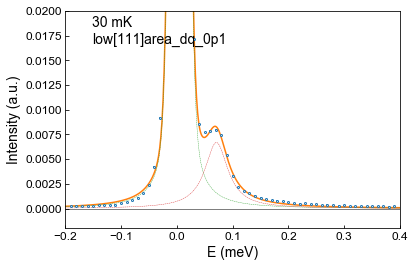

ndzro_30mk_cut@low[111]_dq_0p1.txt
[6.40471791e-03 4.25335193e-03 1.30745489e-02 2.33667191e-01
 5.48780693e-04 7.41299865e-02 2.50000000e-02 6.31965041e-01] 
 [1.31914903e-04 2.41393311e-04 2.66838090e-04 3.04960039e-02
 7.78272257e-05 3.06384942e-03 4.24420072e-03 2.83473992e-01]


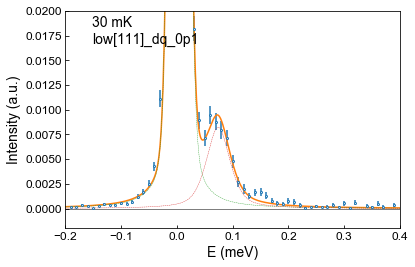

ndzro_30mk_cut@[111]_dq_0p1.txt
[1.82343389e-02 2.51625988e-03 1.10929161e-02 2.87636301e-01
 4.67654288e-04 7.05979106e-02 2.50000000e-02 5.09928452e-01] 
 [3.34268372e-04 1.90392411e-04 2.23169887e-04 2.84221860e-02
 1.42857857e-04 6.38769107e-03 8.05024633e-03 5.62109304e-01]


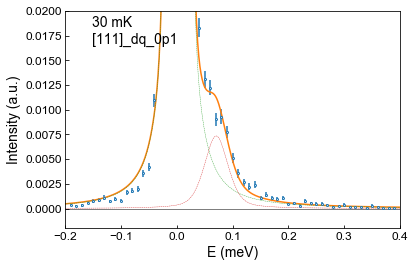

ndzro_30mk_cut@[22-1]_dq_0p1.txt
[7.08371712e-03 4.80500892e-03 1.31773810e-02 2.74283988e-01
 2.42004581e-04 7.39594007e-02 2.23554055e-02 5.46082377e-15
 2.90607026e-04 1.57542517e-01 5.00000000e-02 1.00000000e+00] 
 [1.57560315e-04 2.12927591e-04 2.39820769e-04 3.87022977e-02
 2.73942009e-04 3.26185306e-03 4.08148168e-03 2.79355554e+00
 1.74882440e-04 2.11290394e-02 2.52826075e-02 5.35831117e-01]


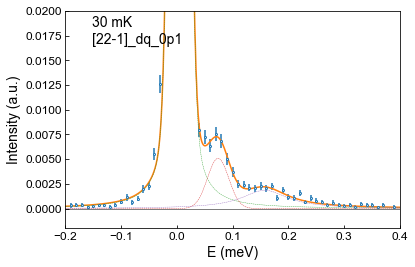

ndzro_30mk_cut@[220]_dq_0p1.txt
[3.09073983e-04 2.67421391e-01 5.00000000e-02 1.00000000e+00] 
 [4.59216463e-05 6.19516497e-03 1.23246111e-02 3.98299711e-01]


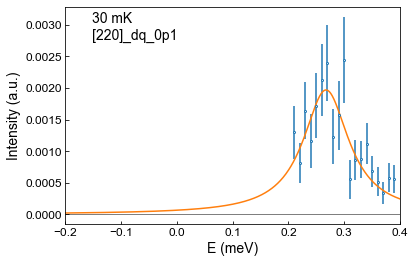

ndzro_30mk_cut@[221]_dq_0p1.txt
[9.23700167e-03 5.45544551e-03 1.31327386e-02 2.96286627e-01
 2.02653634e-04 7.42094543e-02 2.07466878e-02 2.28259336e-02
 1.81870442e-04 1.77951480e-01 5.00000000e-02 9.95304805e-02] 
 [2.44799907e-04 3.03283931e-04 3.61657006e-04 5.27177501e-02
 1.77733586e-04 4.60748601e-03 5.40588605e-03 2.33036775e+00
 8.96199382e-05 1.57084429e-02 1.32823121e-02 5.36456552e-01]


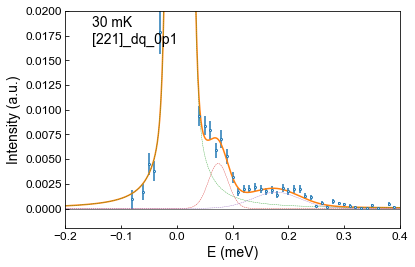

In [27]:
# Export figures
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
%matplotlib inline
lbs = np.array([
      [0, -0.01, 0.01, 0],
      [0,  0.05, 0.01, 0],
      [0,  0.15, 0.01, 0],
      [0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.025, 1],
      [0.1,0.09, 0.025, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [0.012,0,   0.02,0.5],
      [0.001,0.07,0.02,0.5],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.03,0.5]])

# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk ]

# Plot and fit
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit
for i in [0,1,2,3,4,5,6,7]:
    f = os.path.join(fpath, fnames[i])
    print(fnames[i])
    dat = np.genfromtxt(f)
    dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
    dat = fitReg(dat,reg[i])
    x, y, err = dat[:,0],dat[:,1], dat[:,2]
    
    lb = lbs[id_pk[i],:].ravel()
    hb = hbs[id_pk[i],:].ravel()
    p0 = p0s[id_pk[i],:].ravel()

    bounds = [lb, hb]
    N = nb_pk[i]

    popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
                           bounds=bounds, sigma=err, absolute_sigma=False,verbose=0)# if initio value is outside bounds, error
    perr = np.sqrt(np.diag(pcov))
    print(popt,'\n', perr)
    
    fig, ax = plt.subplots(1,1)#, figsize=(5,4))
    s = fnames[i]
    text = ''.join(s[s.find('@')+len('@'):s.rfind('.txt')])
    ax.text(0.08,0.85,'30 mK\n'+text, fontsize=14, transform=ax.transAxes)
    ax.axhline(y=0, c='black', lw=0.5)

    ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white')
    ax.plot(xfit,wrapper_fit_func_PV(xfit,N,popt))
    if N!=1:
        for j in np.arange(N):
            ax.plot(xfit, pvoigt(xfit,*popt[j*4:(j+1)*4]),'--',lw=0.4)

    ax.set_xlim([-0.2,0.4])
    if i not in [6]:
        ax.set_ylim([-0.002,0.02])
        
    ax.set_xlabel('E (meV)',size=14)
    ax.set_ylabel('Intensity (a.u.)',size=14)
    
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    #fig.savefig(f.replace('txt','pdf'),bbox_inches="tight",verbose=True)
    #latexify()
    plt.show()

ndzro_30mk_cut@high[111]area_dq_0p1.txt


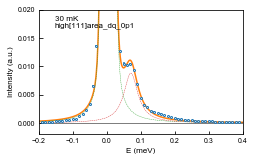

ndzro_30mk_cut@high[111]_dq_0p1.txt


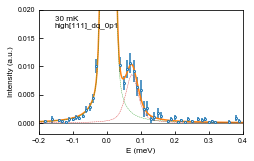

ndzro_30mk_cut@low[111]area_dq_0p1.txt


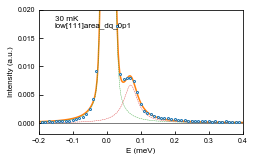

ndzro_30mk_cut@low[111]_dq_0p1.txt


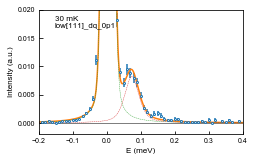

ndzro_30mk_cut@[111]_dq_0p1.txt


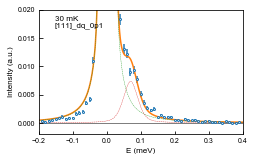

ndzro_30mk_cut@[22-1]_dq_0p1.txt


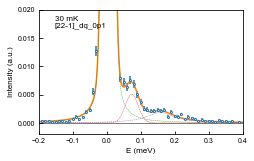

ndzro_30mk_cut@[220]_dq_0p1.txt


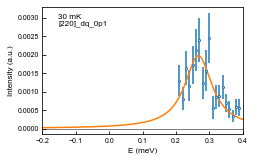

ndzro_30mk_cut@[221]_dq_0p1.txt


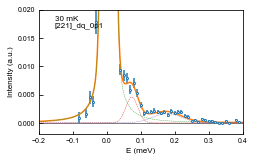

In [150]:
# Export figures (using latexify)
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [0, -0.01, 0.01, 0],
      [0,  0.05, 0.01, 0],
      [0,  0.15, 0.01, 0],
      [0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.025, 1],
      [0.1,0.09, 0.025, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [0.012,0,   0.02,0.5],
      [0.001,0.07,0.02,0.5],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.03,0.5]])

# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk ]

# Plot and fit
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit

latexify()
for i in [0,1,2,3,4,5,6,7]:
    f = os.path.join(fpath, fnames[i])
    print(fnames[i])
    dat = np.genfromtxt(f)
    dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
    dat = fitReg(dat,reg[i])
    x, y, err = dat[:,0],dat[:,1], dat[:,2]
    
    lb = lbs[id_pk[i],:].ravel()
    hb = hbs[id_pk[i],:].ravel()
    p0 = p0s[id_pk[i],:].ravel()

    bounds = [lb, hb]
    N = nb_pk[i]

    popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
                           bounds=bounds, sigma=err, absolute_sigma=True,verbose=0)# if initio value is outside bounds, error
    perr = np.sqrt(np.diag(pcov))
    #print popt,'\n', perr
    
    fig, ax = plt.subplots(1,1)#, figsize=(5,4))
    s = fnames[i]
    text = ''.join(s[s.find('@')+len('@'):s.rfind('.txt')])
    ax.text(0.08,0.85,'30 mK\n'+text, transform=ax.transAxes)
    ax.axhline(y=0, c='black', lw=0.5)

    ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white')
    ax.plot(xfit,wrapper_fit_func_PV(xfit,N,popt))
    if N!=1:
        for j in np.arange(N):
            ax.plot(xfit, pvoigt(xfit,*popt[j*4:(j+1)*4]),'--',lw=0.4)

    ax.set_xlim([-0.2,0.4])
    if i not in [6]:
        ax.set_ylim([-0.002,0.02])

    ax.set_xlabel('E (meV)')
    ax.set_ylabel('Intensity (a.u.)')
    plt.tight_layout(pad=0.3,w_pad=0, h_pad=0)
    #fig.savefig(f.replace('txt','pdf'))
                          
    #fig.savefig(f.replace('txt','pdf'), bbox_inches="tight", verbose=True)
    plt.show()

## Combine low and high [111] for 30mk and 20K<a id='30mK_combine_111'></a>

### Fit with two pv peaks <a id='30mK_combine_111_fit2pks'></a>

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/ndzro_30mk_cut@high[111]_dq_0p1.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/ndzro_30mk_cut@low[111]_dq_0p1.txt
`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 1.3084e+04, final cost 1.4193e+02, first-order optimality 2.12e-03.
[6.69804370e-03 4.62973161e-03 1.31416787e-02 2.35429913e-01
 3.50000000e-04 7.33619134e-02 2.41724268e-02 4.77737929e-16] 
 [6.93363885e-05 1.22259706e-04 1.36361844e-04 1.58404277e-02
 4.40867550e-05 2.01750583e-03 2.34665972e-03 2.60819816e-01]


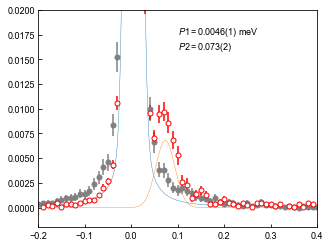

In [16]:
# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [0, -0.01, 0.01, 0],
      [0,  0.05, 0.01, 0],
      [0,  0.15, 0.01, 0],
      [0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.025, 1],
      [0.00035,0.09, 0.025, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [0.012,0,   0.02,0.5],
      [0.0001,0.08,0.02,0.5],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.03,0.5]])

# cols:
# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1],[0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]

# Plot and fit
fig, ax = plt.subplots(1,1, figsize=(5,4), sharex=True, sharey=True)
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit

# 1st: plot the combined 20K background data
f = os.path.join(fpath, fnames0[1]); print(f)
dat = np.genfromtxt(f, usecols=[6,7,8])
x, y, err = dat[:,0],dat[:,1], dat[:,2]*2 # by Xu!!!

# f = os.path.join(fpath, fnames1[3]); print(f)
# dat = np.genfromtxt(f, usecols=[6,7,8])
# y, err = (y+dat[:,1])/2., (err**2+dat[:,2]**2)**0.5/2

ax.errorbar(x,y,err, fmt='o', ms=5, c='grey')

# 2nd: plot the combined 30mK data 
f = os.path.join(fpath, fnames[1]); print(f)
dat = np.genfromtxt(f, usecols=[0,1,2])
dat = fitReg(dat, reg[0])
x0, y0, err0 = dat[:,0],dat[:,1], dat[:,2]

f = os.path.join(fpath, fnames[3]); print(f)
dat = np.genfromtxt(f, usecols=[0,1,2])
dat = fitReg(dat,reg[0])
x1, y1, err1 = dat[:,0],dat[:,1], dat[:,2]

mask = np.logical_or(err0,err1) # remove the data with zero error to avoid fitting failure
x, y, err =x0[mask], (y0[mask]+y1[mask])/2, (err0[mask]**2+err1[mask]**2)**0.5/2

ax.errorbar(x,y,err, fmt='o', ms=5,  mfc='white', c='red')

# Fitting
lb = lbs[id_pk[0],:].ravel()
hb = hbs[id_pk[0],:].ravel()
p0 = p0s[id_pk[0],:].ravel()

bounds = [lb, hb]
N = nb_pk[0]

popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
                       bounds=bounds, sigma=err, absolute_sigma=True,verbose=1)# if initio value is outside bounds, error
perr = np.sqrt(np.diag(pcov))
print(popt,'\n', perr)

#ax.plot(xfit,wrapper_fit_func_PV(xfit,N,popt))
if N!=1:
    for j in np.arange(0,N):
        ax.plot(xfit, pvoigt(xfit,*popt[j*4:(j+1)*4]),'-',lw=0.4)
else:
    ax.plot(xfit, pvoigt(xfit,*popt),'-',lw=0.4)

ax.set_xlim([-0.2,0.4])
ax.set_ylim([-0.002,0.02])

# Show pars in form of '1.2(1) K' (value(error))
Nerr = np.abs(np.floor(np.log10(abs(perr)))).astype(int) # get position of the first non-zero digit of the error
Rerr = [np.round(perr[i],decimals=Nerr[i]) for i in range(len(popt))] # round the error to have only one effective nb
Serr = np.array(Rerr).astype(str) # convert error to 
Serr = [np.int(Serr[i][-1]) for i in range(len(popt))] # get the last digit of the error

if N==2:
    ax.text(0.5,0.8,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
            + '({:d}) meV'.format(Serr[1])
            +'\n'
            +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
            + '({:d})'.format(Serr[5]), 
            transform=ax.transAxes,ha='left',va='bottom')
elif N==3:
    ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
            + '({:d}) meV'.format(Serr[1])
            +'\n'
            +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
            + '({:d})'.format(Serr[5])
            +'\n'
            +r'$P3=$'+'{:{width}.{prec}f}'.format(popt[9],width=0,prec=Nerr[9])
            + '({:d})'.format(Serr[9]), 
            transform=ax.transAxes,ha='left',va='bottom')
elif N==1:
    ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
            + '({:d}) meV'.format(Serr[1]), 
            transform=ax.transAxes,ha='left',va='bottom')
plt.show()    

### Fit with subtracting locally fitted 20k data as bk <a id='30mK_combine_111_fit20Kbk'></a>

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt
`ftol` termination condition is satisfied.
Function evaluations 22, initial cost 9.0785e+07, final cost 2.5373e+00, first-order optimality 2.56e-05.
[1.95181516e+01 4.28862465e-01 1.12810249e-03] 
 [4.17811985e+00 7.13558679e-02 2.30752846e-04]
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt
[4.10624822e-04 7.21627356e-02 1.90000000e-02 7.75503189e-01] 
 [2.91960631e-05 1.16582060e-03 1.93450041e-03 1.91606963e-01]


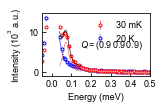

In [17]:
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [0, -0.01, 0.01, 0],
      [0,  0.05, 0.01, 0],
      [0,  0.15, 0.01, 0],
      [0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [1.1,0.01, 0.025, 1],
      [1.1,0.09, 0.019, 1],
      [1.1,0.20, 0.05, 1],
      [1.1,0.3,  0.05, 1]])
p0s = np.array([
      [0.12,0,   0.02,0.5],
      [0.12,0.08,0.015,0.5],
      [0.12,0.18,0.02,0.5],
      [0.01,0.25,0.03,0.5]])

# files
f_nb = np.array([[1,3],[1,3], [5,7], [6,6]]) # low&high 111; (221)&(22-1); (220)
# fit region for different files
reg = [[-0.2,0.2],[0.04, 0.15],[0.1,0.3],[0.17,0.45]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0],[1],[2],[3]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]
# lables
q_texts = [r'$Q = (0.9\,0.9\,0.9)$',r'$Q = (0.9\,0.9\,0.9)$',r'$Q = (2\,2\,1)$',r'$Q = (2\,2\,0)$']
q_tests_pos = np.array([[0.3,0.5],[0.35,0.45],[0.55,0.5],[0.05,0.12]])
# ylmis
ylims = np.array([[-0.001,0.02],[-0.001,0.015],[-0.0005,0.005],[-0.0005,0.005]]) *1000
# save fig names
fignames = ['30mK_20K_elastic.pdf','30mK_20K_gap.pdf','30mK_20K_med.pdf','30mK_20K_top.pdf',]
############
which_pk = 1 # 1,2,3 not zero
"Try both fnames0, fnames for 30mK"
############

# Plot and fit
fig, ax = plt.subplots(1,1,figsize=(6.9/3*0.9,6.9/3*0.9/1.618))#, figsize=(5,4), sharex=True, sharey=True)
xfit=np.linspace(reg[which_pk][0],reg[which_pk][1],100) # x for plot the fit
xfit0=np.linspace(0, 0.1, 100) # x for plot the fit

# 1st: plot the combined 20K background data
# load 1
f = os.path.join(fpath, fnames0[f_nb[which_pk, 0]]); print(f)
dat = np.genfromtxt(f, usecols=[6,7,8])
x0, y0, err0 = dat[:,0],dat[:,1], dat[:,2]
# load 2
f = os.path.join(fpath, fnames0[f_nb[which_pk, 1]]); print(f)
dat = np.genfromtxt(f, usecols=[6,7,8])
x1, y1, err1 = dat[:,0],dat[:,1], dat[:,2]
# averaging and plot
mask = np.logical_or(err0,err1) # remove the data with zero error to avoid fitting failure
x, y, err =x0[mask], (y0[mask]+y1[mask])/2, (err0[mask]**2+err1[mask]**2)**0.5/2
ax.errorbar(x,1000*y,1000*err, fmt='o', mfc='white', ms=3, lw=0.4, c='b',label='20 K')
# fit region and fit
dat = fitReg(np.vstack([x,y,err]).T, reg[which_pk])
x, y, err = dat[:,0],dat[:,1], dat[:,2]

popt0, pcov0 = curve_fit(streExp, x, y, p0=[1,1,0],
                             bounds=[[0,0,-0.1],[np.inf,2,0.1]], sigma=err, absolute_sigma=True,verbose=1)# if initio value is outside bounds, error
perr0 = np.sqrt(np.diag(pcov0))
print(popt0,'\n', perr0)
ax.plot(xfit, 1000*streExp(xfit,*popt0), linestyle='--', dashes=(1.2, 0.8),c='b',lw=1,zorder=10)

# 2nd: plot the combined 30mK data 
# load 1
f = os.path.join(fpath, fnames0[f_nb[which_pk, 0]]); print(f)
dat = np.genfromtxt(f, usecols=[0,1,2])
x0, y0, err0 = dat[:,0],dat[:,1], dat[:,2]
# load 2
f = os.path.join(fpath, fnames0[f_nb[which_pk, 1]]); print(f)
dat = np.genfromtxt(f, usecols=[0,1,2])
x1, y1, err1 = dat[:,0],dat[:,1], dat[:,2]
# average and plot
mask = np.logical_or(err0,err1) # remove the data with zero error to avoid fitting failure
x, y, err =x0[mask], (y0[mask]+y1[mask])/2, (err0[mask]**2+err1[mask]**2)**0.5/2
ax.errorbar(x,1000*y,1000*err, fmt='o', ms=3, lw=0.6, mfc='white', c='red',label='30 mK')
# fit region
dat = fitReg(np.vstack([x,y,err]).T, reg[which_pk])
x, y, err = dat[:,0],dat[:,1], dat[:,2]

# Fitting
lb = lbs[id_pk[which_pk],:].ravel()
hb = hbs[id_pk[which_pk],:].ravel()
p0 = p0s[id_pk[which_pk],:].ravel()

bounds = [lb, hb]
N = nb_pk[which_pk]

popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y-streExp(x,*popt0), p0=p0,
                       bounds=bounds, sigma=err, absolute_sigma=False,verbose=0)# if initio value is outside bounds, error
perr = np.sqrt(np.diag(pcov))
print(popt,'\n', perr)

ax.plot(xfit,1000*pvoigt(xfit,*popt), linestyle='--', dashes=(1.2, 0.8),c='r', lw=0.6,zorder=10)
ax.plot(xfit,1000*(pvoigt(xfit,*popt)+streExp(xfit,*popt0)), '-', c='black', lw=0.6,zorder=10)

ax.text(q_tests_pos[which_pk,0],q_tests_pos[which_pk,1], q_texts[which_pk],transform=ax.transAxes,fontsize=9)    
ax.set_xlim([-0.05,0.5])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
ax.set_ylim(ylims[which_pk])
plt.xlabel('Energy (meV)')
plt.ylabel(r'Intensity ($10^3$ a.u.)')
handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
ax.legend(handles,labels,loc='best',frameon=False, fontsize=9)

plt.tight_layout(pad=0.0,w_pad=0, h_pad=0)
#fig.savefig(os.path.join(fpath,fignames[which_pk]))#, bbox_inches="tight", verbose=True)
plt.show()

In [18]:
def ndformfact1(q):# use numpy not sp
    s,j,l,ss = q/(4*np.pi), 9/2., 6., 3/2. ### Take care of the fraction 9/2=4
    fc = (j*(j+1)-ss*(ss+1)+l*(l+1))/(3*j*(j+1)+ss*(ss+1)-l*(l+1))
    
    j0 = [0.0540,25.0293,0.3101,12.1020,0.6575,4.7223,-0.0216]
    j2 = [0.6751,18.3421,1.6272,7.2600,0.9644,2.6016,0.0150]
    
    fm = (j0[0]*np.exp(-j0[1]*s**2) + j0[2]*np.exp(-j0[3]*s**2)+j0[4]*np.exp(-j0[5]*s**2) + j0[6] 
          + s**2*(j2[0]*np.exp(-j2[1]*s**2)+j2[2]*np.exp(-j2[3]*s**2)+j2[4]*np.exp(-j2[5]*s**2)+j2[6])*fc)
    return fm**2
def hkl2q(lat=[10.65,10.65,10.65], hkl=[1,1,1]):
    rlu = 2*np.pi/np.array(lat)
    q_vec = np.array(hkl)*rlu
    q_mod = np.sum(q_vec**2)**0.5
    return q_mod
print(hkl2q(hkl=[2,2,0]))
print(2*3.1415/10.67*2*np.sqrt(2))

ff999 = ndformfact1(hkl2q(hkl=[0.9,0.9,0.9]))
ff221 = ndformfact1(hkl2q(hkl=[2,2,1]))
ff220 = ndformfact1(hkl2q(hkl=[2,2,0]))
print(ff999, ff221, ff220)

1.6686884274773206
1.665511492481754
0.9737773456934197 0.905167416459053 0.9153729360336819


D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Q[22-1]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Q[221]_dq_0p2.txt
`ftol` termination condition is satisfied.
Function evaluations 21, initial cost 7.3120e+08, final cost 1.7345e+01, first-order optimality 4.82e-04.
[1.08656489e+01 2.60828189e-01 4.17211563e-05] 
 [3.42028181e-01 1.06049506e-02 7.95097355e-05]
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Q[22-1]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Q[221]_dq_0p2.txt
[1.11212548e-04 7.46040560e-02 1.74333170e-02 8.93208618e-23
 9.40235030e-05 1.84974382e-01 4.33370689e-02 8.86069539e-02] 
 [2.36282161e-05 1.26418969e-03 1.79803723e-03 6.83327895e-01
 1.87707255e-05 4.15165120e-03 5.45079746e-03 5.48211626e-01]


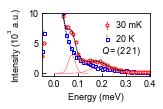

In [19]:
# Plot not only the fitted region
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [0, -0.01, 0.01, 0],
      [0,  0.0752, 0.024, 0],
      [0,  0.184, 0.01, 0],
      [0,  0.260,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [1.1,0.01, 0.025, 1],
      [1.1,0.0754, 0.025, 1],
      [1.1,0.185, 0.05, 1],
      [1.1,0.270,  0.05, 1]])
p0s = np.array([
      [0.12,0,   0.02,0.5],
      [0.12,0.0753,0.025,0.5],
      [0.12,0.1844,0.02,0.5],
      [0.01,0.266,0.03,0.5]])
lbs = np.array([
      [0, -0.01, 0.01, 0],
      [0,  0.05, 0.01, 0],
      [0,  0.15, 0.01, 0],
      [0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [1.1,0.01, 0.025, 1],
      [1.1,0.09, 0.019, 1],
      [1.1,0.20, 0.05, 1],
      [1.1,0.3,  0.05, 1]])
p0s = np.array([
      [0.12,0,   0.02,0.5],
      [0.12,0.08,0.015,0.5],
      [0.12,0.18,0.02,0.5],
      [0.01,0.25,0.03,0.5]])
# files
f_nb = np.array([[1,3],[1,3], [5,7], [6,6]]) # low&high 111; (221)&(22-1); (220)
# fit region for different files
reg = [[-0.2,0.2],[0.04, 0.15],[0.03,0.3],[0.03,0.45]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0],[1],[1,2],[1,3]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]
# lables
q_texts = [r'$Q = (0.9\,0.9\,0.9)$',r'$Q = (0.9\,0.9\,0.9)$',r'$Q = (2\,2\,1)$',r'$Q = (2\,2\,0)$']
q_texts_pos = np.array([[0.3,0.4],[0.4,0.35],[0.55,0.35],[0.05,0.12]])
# ylmis
ylims = np.array([[-0.001,0.02],[-0.001,0.015],[-0.0005,0.01],[-0.0005,0.005]]) *1000
# save fig names
fignames = ['30mK_20K_elastic.pdf','30mK_20K_gap.pdf','30mK_20K_med.pdf','30mK_20K_top.pdf',]
############
which_pk = 2 # 1,2,3 without 0
"Try both fnames0, fnames for 30mK"
############

# Plot and fit
fig, ax = plt.subplots(1,1,figsize=(6.9/3*0.9,6.9/3*0.9/1.618))#, figsize=(5,4), sharex=True, sharey=True)
xfit=np.linspace(reg[which_pk][0],reg[which_pk][1],100) # x for plot the fit

# 1st: plot the combined 20K background data
# load 1
f = os.path.join(fpath, fnames0[f_nb[which_pk, 0]]); print(f)
dat = np.genfromtxt(f, usecols=[3,4,5])#[6,7,8])
x0, y0, err0 = dat[:,0],dat[:,1], dat[:,2]
# load 2
f = os.path.join(fpath, fnames0[f_nb[which_pk, 1]]); print(f)
dat = np.genfromtxt(f, usecols=[3,4,5])#[6,7,8])
x1, y1, err1 = dat[:,0],dat[:,1], dat[:,2]
# averaging and plot
mask = np.logical_or(err0,err1) # remove the data with zero error to avoid fitting failure
x, y, err =x0[mask], (y0[mask]+y1[mask])/2, (err0[mask]**2+err1[mask]**2)**0.5/2
ax.errorbar(x,1000*y,1000*err, fmt='s', mfc='white', ms=3, lw=0.4, c='b',label='20 K')
# fit region and fit
dat = fitReg(np.vstack([x,y,err]).T, reg[which_pk])
x, y, err = dat[:,0],dat[:,1], dat[:,2]

popt0, pcov0 = curve_fit(streExp, x, y, p0=[1,1,0],
                             bounds=[[0,0,-0.1],[np.inf,2,0.1]], sigma=err, absolute_sigma=True,verbose=1)# if initio value is outside bounds, error
perr0 = np.sqrt(np.diag(pcov0))
print(popt0,'\n', perr0)
ax.plot(xfit, 1000*streExp(xfit,*popt0), linestyle='--', dashes=(1.2, 0.8),c='b',lw=1,zorder=10)

# 2nd: plot the combined 30mK data 
# load 1
f = os.path.join(fpath, fnames0[f_nb[which_pk, 0]]); print(f)
dat = np.genfromtxt(f, usecols=[0,1,2])
x0, y0, err0 = dat[:,0],dat[:,1], dat[:,2]
# load 2
f = os.path.join(fpath, fnames0[f_nb[which_pk, 1]]); print(f)
dat = np.genfromtxt(f, usecols=[0,1,2])
x1, y1, err1 = dat[:,0],dat[:,1], dat[:,2]
# average and plot
mask = np.logical_or(err0,err1) # remove the data with zero error to avoid fitting failure
x, y, err =x0[mask], (y0[mask]+y1[mask])/2, (err0[mask]**2+err1[mask]**2)**0.5/2
ax.errorbar(x,1000*y,1000*err, fmt='o', ms=3, lw=0.6, mfc='white', c='red',label='30 mK')
# fit region
dat = fitReg(np.vstack([x,y,err]).T, reg[which_pk])
x, y, err = dat[:,0],dat[:,1], dat[:,2]

# Fitting
lb = lbs[id_pk[which_pk],:].ravel()
hb = hbs[id_pk[which_pk],:].ravel()
p0 = p0s[id_pk[which_pk],:].ravel()

bounds = [lb, hb]
N = nb_pk[which_pk]

popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y-streExp(x,*popt0), p0=p0,
                       bounds=bounds, sigma=err, absolute_sigma=False,verbose=0)# if initio value is outside bounds, error
perr = np.sqrt(np.diag(pcov))
print(popt,'\n', perr)

for j in np.arange(0,N):
    xfit1 = np.linspace(popt[j*4+1]-4*popt[j*4+2], popt[j*4+1]+4*popt[j*4+2],num=100)
    ax.plot(xfit1,1000* pvoigt(xfit1,*popt[j*4:(j+1)*4]), linestyle='--', dashes=(1.2, 0.8),c='r', lw=0.6,zorder=10)
    
#ax.plot(xfit,1000*pvoigt(xfit,*popt), linestyle='--', dashes=(1.2, 0.8),c='r', lw=0.6,zorder=10)
ax.plot(xfit,1000*(wrapper_fit_func_PV(xfit, N, popt)+streExp(xfit,*popt0)), '-', c='black', lw=0.6,zorder=10)

ax.text(q_texts_pos[which_pk,0], q_texts_pos[which_pk,1], q_texts[which_pk],transform=ax.transAxes,fontsize=9)    

ax.set_xlim([-0.05,0.4])
plt.xticks([0,0.1,0.2,0.3,0.4])
ax.set_ylim(ylims[which_pk])
#ax.set_ylim([0,10])
plt.xlabel('Energy (meV)')
plt.ylabel(r'Intensity ($10^3$ a.u.)')
handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
ax.legend(handles,labels,loc='best',frameon=False, fontsize=9,handletextpad=0)

plt.tight_layout(pad=0.0,w_pad=0, h_pad=0)
#fig.savefig(os.path.join(fpath,fignames[which_pk]))#, bbox_inches="tight", verbose=True)
plt.show()

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt
`ftol` termination condition is satisfied.
Function evaluations 18, initial cost 1.5493e+08, final cost 4.2286e+00, first-order optimality 1.59e-05.
[1.82965471e+01 4.27316501e-01 1.34035272e-03] 
 [1.48059773e+00 2.54869602e-02 1.56130034e-04]
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt
[0.0002535  0.0744626  0.01950095 0.07777827] 
 [1.33709702e-05 5.94632543e-04 7.88785925e-04 1.62592413e-01]
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Q[22-1]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Q[221]_dq_0p2.txt
`ftol` termination condition is satisfied.
Function evaluations 21, initial cost 7.3120e+08, final cost 1.7345e+01, first-order opti

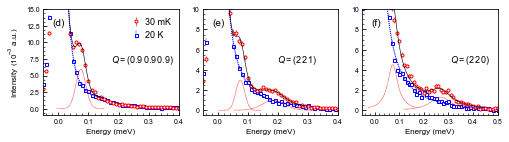

In [151]:
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [0, -0.01, 0.01, 0],
      [0,  0.0752, 0.024, 0],
      [0,  0.184, 0.01, 0],
      [0,  0.260,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [1.1,0.01, 0.025, 1],
      [1.1,0.0754, 0.025, 1],
      [1.1,0.185, 0.05, 1],
      [1.1,0.270,  0.05, 1]])
p0s = np.array([
      [0.12,0,   0.02,0.5],
      [0.12,0.0753,0.025,0.5],
      [0.12,0.1844,0.02,0.5],
      [0.01,0.266,0.03,0.5]])
lbs = np.array([
      [0, -0.01, 0.01, 0],
      [0,  0.074, 0.01, 0],
      [0,  0.15, 0.01, 0],
      [0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [1.1,0.01, 0.025, 1],
      [1.1,0.09, 0.025, 1],
      [1.1,0.20, 0.05, 1],
      [1.1,0.3,  0.05, 1]])
p0s = np.array([
      [0.12,0,   0.02,0.5],
      [0.12,0.08,0.015,0.5],
      [0.12,0.18,0.02,0.5],
      [0.01,0.25,0.03,0.5]])
# files
f_nb = np.array([[1,3],[1,3], [5,7], [6,6]]) # low&high 111; (221)&(22-1); (220)
# fit region for different files
reg = [[-0.2,0.2],[0.03, 0.15],[0.03,0.3],[0.04,0.45]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0],[1],[1,2],[1,3]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]
# lables
q_texts = [r'$Q = (0.9\,0.9\,0.9)$',r'$Q = (0.9\,0.9\,0.9)$',r'$Q = (2\,2\,1)$',r'$Q = (2\,2\,0)$']
#q_texts_pos = np.array([[0.3,0.4],[0.4,0.35],[0.55,0.35],[0.05,0.12]])
q_texts_pos = np.array([[0.3,0.4],[0.5,0.5],[0.55,0.5],[0.65,0.5]])
texts = ['None','(d)', '(e)', '(f)']
texts_pos = np.array([[0.07,0.85],[0.07,0.85],[0.07,0.85],[0.07,0.85]])
# ylmis
ylims = np.array([[-0.001,0.02],[-0.001,0.015],[-0.0005,0.01],[-0.0005,0.01]]) *1000
# save fig names
fignames = ['30mK_20K_elastic.pdf','30mK_20K_gap.pdf','30mK_20K_med.pdf','30mK_20K_top.pdf',]
############
which_pk = 2 # 1,2,3 without 0
"Try both fnames0, fnames for 30mK"
############

latexify(fig_width=6.9, fig_height=1.8, columns=2)
fig, axs = plt.subplots(nrows=1,ncols=3)

for i in [1, 2, 3]:
    # Plot and fit
    ax = axs[i-1]
    xfit=np.linspace(reg[i][0],reg[i][1],100) # x for plot the fit
    
    # 1st: plot the combined 20K background data
    # load 1
    f = os.path.join(fpath, fnames0[f_nb[i, 0]]); print(f)
    dat = np.genfromtxt(f, usecols=[3,4,5])#[6,7,8])
    x0, y0, err0 = dat[:,0],dat[:,1], dat[:,2]
    # load 2
    f = os.path.join(fpath, fnames0[f_nb[i, 1]]); print(f)
    dat = np.genfromtxt(f, usecols=[3,4,5])#[6,7,8])
    x1, y1, err1 = dat[:,0],dat[:,1], dat[:,2]
    # averaging and plot
    mask = np.logical_or(err0,err1) # remove the data with zero error to avoid fitting failure
    x, y, err =x0[mask], (y0[mask]+y1[mask])/2, (err0[mask]**2+err1[mask]**2)**0.5/2
    ax.errorbar(x,1000*y,1000*err, fmt='s', mfc='white', ms=3, lw=0.4, c='b',label='20 K')
    # fit region and fit
    dat = fitReg(np.vstack([x,y,err]).T, reg[i])
    x, y, err = dat[:,0],dat[:,1], dat[:,2]

    popt0, pcov0 = curve_fit(streExp, x, y, p0=[1,1,0],
                                 bounds=[[0,0,-0.1],[np.inf,2,0.1]], sigma=err, absolute_sigma=True,verbose=1)# if initio value is outside bounds, error
    perr0 = np.sqrt(np.diag(pcov0))
    print(popt0,'\n', perr0)
    ax.plot(xfit, 1000*streExp(xfit,*popt0), linestyle='--', dashes=(1.2, 0.8),c='b',lw=1,zorder=10)

    # 2nd: plot the combined 30mK data 
    # load 1
    f = os.path.join(fpath, fnames0[f_nb[i, 0]]); print(f)
    dat = np.genfromtxt(f, usecols=[0,1,2])
    x0, y0, err0 = dat[:,0],dat[:,1], dat[:,2]
    # load 2
    f = os.path.join(fpath, fnames0[f_nb[i, 1]]); print(f)
    dat = np.genfromtxt(f, usecols=[0,1,2])
    x1, y1, err1 = dat[:,0],dat[:,1], dat[:,2]
    # average and plot
    mask = np.logical_or(err0,err1) # remove the data with zero error to avoid fitting failure
    x, y, err =x0[mask], (y0[mask]+y1[mask])/2, (err0[mask]**2+err1[mask]**2)**0.5/2
    ax.errorbar(x,1000*y,1000*err, fmt='o', ms=3, lw=0.6, mfc='white', c='red',label='30 mK')
    # fit region
    dat = fitReg(np.vstack([x,y,err]).T, reg[i])
    x, y, err = dat[:,0],dat[:,1], dat[:,2]

    # Fitting
    lb = lbs[id_pk[i],:].ravel()
    hb = hbs[id_pk[i],:].ravel()
    p0 = p0s[id_pk[i],:].ravel()

    bounds = [lb, hb]
    N = nb_pk[i]

    popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y-streExp(x,*popt0), p0=p0,
                           bounds=bounds, sigma=err, absolute_sigma=True,verbose=0)# if initio value is outside bounds, error
    perr = np.sqrt(np.diag(pcov))
    print(popt,'\n', perr)

    for j in np.arange(0,N):
        if id_pk[i][j]==2 or id_pk[i][j]==3:
            xfit1 = np.linspace(popt[j*4+1]-3*popt[j*4+2], popt[j*4+1]+3*popt[j*4+2],num=100)
        else:
            xfit1 = np.linspace(popt[j*4+1]-4*popt[j*4+2], popt[j*4+1]+4*popt[j*4+2],num=100)
        ax.plot(xfit1,1000* pvoigt(xfit1,*popt[j*4:(j+1)*4]), linestyle='--', dashes=(1.2, 0.8),c='r', lw=0.6,zorder=10)

    #ax.plot(xfit,1000*pvoigt(xfit,*popt), linestyle='--', dashes=(1.2, 0.8),c='r', lw=0.6,zorder=10)
    ax.plot(xfit,1000*(wrapper_fit_func_PV(xfit, N, popt)+streExp(xfit,*popt0)), '-', c='black', lw=0.6,zorder=10)

    ax.text(q_texts_pos[i,0], q_texts_pos[i,1], q_texts[i], transform=ax.transAxes,fontsize=9)    
    ax.text(texts_pos[i,0], texts_pos[i,1], texts[i], color='black',transform=ax.transAxes,fontsize=10) 
    
    if i==3:
        ax.set_xlim([-0.05,0.5])
        ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5])
    else:
        ax.set_xlim([-0.05,0.4])
        ax.set_xticks([0,0.1,0.2,0.3,0.4])
    ax.set_ylim(ylims[i])
    ax.minorticks_on()
    if i==2 or i==3:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=2))
    ax.set_xlabel('Energy (meV)')
    if i==1:
        ax.set_ylabel(r'Intensity ($10^{-3}$ a.u.)')
        handles,labels = ax.get_legend_handles_labels()
        handles = [handles[1], handles[0]]
        labels = [labels[1], labels[0]]
        ax.legend(handles,labels,loc='best',frameon=False, fontsize=9,handletextpad=0)

    plt.tight_layout(pad=0.1,w_pad=1, h_pad=0)
    
plt.show()
#fig.savefig(os.path.join(fpath,'fit_3e.pdf'))#, bbox_inches="tight", verbose=True)

### Fit with subtracting locally fitted 450mk/20k data as bk<a id='30mK_combine_111_loc_fit450mk20k'></a>

D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qhigh[111]area_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qhigh[111]area_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qlow[111]area_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qlow[111]area_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Q[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Q[111]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/I-E_3temps_unsub_sub_Q[22-1]_dq_0p2.txt
D:\5_Neutron Scattering\9_Orisis_NdZrO\cut

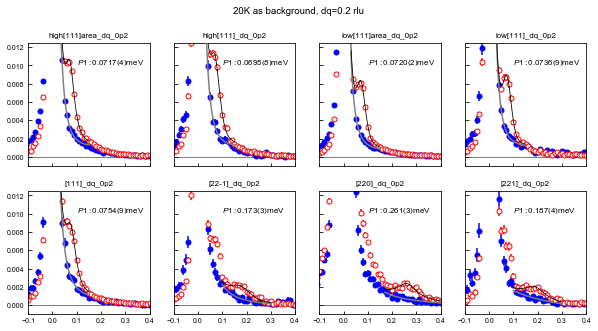

In [152]:
# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
''' Change 'filenames[0,1]' for different dq range 0.2,0.1 rul.
    Change usecols for (3,4,5) 450mK and (6,7,8) 20K bk
'''
lbs = np.array([
      [0, -0.01, 0.01, 0],
      [0,  0.05, 0.01, 0],
      [0,  0.15, 0.01, 0],
      [0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.025, 1],
      [0.1,0.09, 0.025, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [0.012,0,   0.02,0.5],
      [0.001,0.07,0.02,0.5],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.03,0.5]])

# fit region for different files
reg = [[0.03,0.15],[0.03,0.15],[0.03,0.15],[0.03,0.15],[0.03,0.15],[0.1,0.3],[0.17,0.4],[0.1,0.3]]
# Peak idx for the peaks appearing in different files     
id_pk = [[1], [1], [1], [1], [1], [2], [3], [2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk ]
# background: 450mK or 20K
usecols = [[3,4,5],[6,7,8]]

################
which_bk = 1 # background: 450mK or 20K
super_title = ['450mK as background', '20K as background'][which_bk]

which_dq = 0
super_title = super_title + [', dq=0.2 rlu', ', dq=0.1 rlu'][which_dq]
data_dq = [fnames0, fnames1][which_dq] # integrate dq=0.2 and 0.1 unit
################

# Plot and fit
fig, axs = plt.subplots(2,4, figsize=(10,5),sharex=True,sharey=True)
for i in [0,1,2,3,4,5,6,7]:
    ax = axs[i//4,np.remainder(i,4)]  
    xfit=np.linspace(reg[i][0],reg[i][1],100) # x for plot the fit
    
    # 1st: plot the 450mK or 20K as background
    f = os.path.join(fpath, data_dq[i]); print(f)
    dat = np.genfromtxt(f, usecols=usecols[which_bk])
    x, y, err = dat[:,0],dat[:,1], dat[:,2]

    ax.errorbar(x,y,err, fmt='o', ms=5, c='b')

    dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
    dat = fitReg(dat, reg[i])
    x, y, err = dat[:,0],dat[:,1], dat[:,2]
    popt0, pcov0 = curve_fit(streExp, x, y, p0=[1,1,0],
                             bounds=[[0,0,-0.1],[np.inf,2,0.1]], sigma=err, absolute_sigma=True,verbose=0)# if initio value is outside bounds, error
    perr0 = np.sqrt(np.diag(pcov0))
    #print popt0,'\n', perr0

    ax.plot(xfit, streExp(xfit,*popt0),zorder=10,c='grey')
    
    # 2nd: fit and plot 30mk with subtracting bk
    f = os.path.join(fpath, data_dq[i]);print(f)
    dat = np.genfromtxt(f, usecols=[0,1,2])
    dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
    dat0 = fitReg(dat,reg[i])
    x, y, err = dat0[:,0],dat0[:,1], dat0[:,2] #np.vsplit(fitReg(dat,reg[i]).T,3)[0:3]

    lb = lbs[id_pk[i],:].ravel()
    hb = hbs[id_pk[i],:].ravel()
    p0 = p0s[id_pk[i],:].ravel()
    bounds = [lb, hb]
    N = nb_pk[i]

    popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y-streExp(x,*popt0), p0=p0,
                           bounds=bounds, sigma=err, absolute_sigma=True,verbose=0)# if initio value is outside bounds, error
    perr = np.sqrt(np.diag(pcov))
    #print popt,'\n', perr

    s = data_dq[i]
    ax.set_title(s[s.find('Q')+len('Q'):s.rfind('.txt')])  
    ax.axhline(y=0, c='black', lw=0.5)
    
    ax.errorbar(dat[:,0],dat[:,1], dat[:,2], fmt='o', ms=5,  mfc='white', c='red')

    if N!=1:
        for j in np.arange(1,N):
            ax.plot(xfit, pvoigt(xfit,*popt[j*4:(j+1)*4]),'-',lw=0.4)
            
    ax.plot(xfit, wrapper_fit_func_PV(xfit, N, popt)+streExp(xfit,*popt0),'-',c='black',lw=0.8,zorder=10)
        
    ax.set_xlim([-0.1,0.4])
    ax.set_ylim([-0.001,0.0125])

    # Show pars in form of '1.2(1) K' (value(error))
    Nerr = np.abs(np.floor(np.log10(abs(perr)))).astype(int) # get position of the first non-zero digit of the error
    Rerr = [np.round(perr[i],decimals=Nerr[i]) for i in range(len(popt))] # round the error to have only one effective nb
    Serr = np.array(Rerr).astype(str) # convert error to 
    Serr = [np.int(Serr[i][-1]) for i in range(len(popt))] # get the last digit of the error
    
    if N==2:
        ax.text(0.5,0.8,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1])
                +'\n'
                +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                + '({:d})'.format(Serr[5]), 
                transform=ax.transAxes,ha='left',va='bottom')
    elif N==3:
        ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1])
                +'\n'
                +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                + '({:d})'.format(Serr[5])
                +'\n'
                +r'$P3=$'+'{:{width}.{prec}f}'.format(popt[9],width=0,prec=Nerr[9])
                + '({:d})'.format(Serr[9]), 
                transform=ax.transAxes,ha='left',va='bottom')
    elif N==1:
        ax.text(0.4,0.8,r'$P1:$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d})meV'.format(Serr[1]), 
                transform=ax.transAxes,ha='left',va='bottom')
fig.suptitle(super_title)
plt.show()    

In [ ]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

fidx=11
print(fnames[fidx])
f = os.path.join(fpath, fnames[fidx])
ie = np.genfromtxt(f)

figlab=['240mk','450mk','20k']
mcolor=['r','b','k']

fig, axs = plt.subplots(figsize=(10,4),nrows=1,ncols=2)
 
def manipulate(x1 = 0.1, x2 = 20):
    global fig, axs
    axs[0].cla() 
    axs[1].cla()
    
    i = 1
    mask = ie[:,i*3+1]>0. # use logY, so ignor the negative
    axs[0].errorbar(ie[mask,i*3], ie[mask,i*3+1], yerr=ie[mask,i*3+2], fmt='o',ms=3, label=figlab[i],
                              ecolor=mcolor[i], mec=mcolor[i],mfc='none')
            
    i = 2  
    mask = ie[:,i*3+1]>0.
    axs[0].errorbar(ie[mask,i*3], np.exp(-ie[mask,i*3]*11.6/x2)*ie[mask,i*3+1], yerr=np.exp(-ie[mask,i*3]*11.6/x2)*ie[mask,i*3+2], fmt='o',ms=3, label=figlab[i],
                    ecolor=mcolor[i], mec=mcolor[i],mfc='none')
    
    axs[1].errorbar(ie[mask,3], ie[mask,4]-ie[mask,7] , yerr=0*ie[mask,5],fmt='-o',ms=3)
    axs[1].errorbar(ie[mask,3], ie[mask,4]-np.exp(ie[mask,3]*11.6/x2)*ie[mask,7] , yerr=0*ie[mask,5],fmt='-o',ms=3)
        

    axs[0].text(0.35,0.1,r'Q$=(200)$',size=15, ha='center', va='center',
                  backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    #axs[0].set_xlim([-0.2,0.5])    
    axs[0].set_ylim([0.002,3.5])  
    axs[0].legend(numpoints=1,frameon=False, loc='best')  
    axs[0].set_yscale('log')
    axs[0].set_xlabel('E (meV)',size=14)
    axs[0].set_ylabel('Intensity (a.u.)',size=14)
    return

interact(manipulate, x1=widgets.FloatSlider(min=0.01,max=0.5,step=0.01,value=0.1),
                     x2=widgets.FloatSlider(min=1,   max=20, step=1,   value=20))#,__manual=True) 


## Using Symfit do global fit <a id='30mk_symfit'></a>

In [21]:
# Use Symfit to do global fitting
x, y, err = [], [] , []
# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
for i in [0,1,2,3,4,5,6,7]:
    f = os.path.join(fpath, fnames[i])   
    print(fnames[i])
    f = os.path.join(fpath, fnames[i])
    dat = np.genfromtxt(f)
    dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
    dat = fitReg(dat,reg[i])
    x.append(dat[:,0])
    y.append(dat[:,1])
    err.append(dat[:,2])

ndzro_30mk_cut@high[111]area_dq_0p1.txt
ndzro_30mk_cut@high[111]_dq_0p1.txt
ndzro_30mk_cut@low[111]area_dq_0p1.txt
ndzro_30mk_cut@low[111]_dq_0p1.txt
ndzro_30mk_cut@[111]_dq_0p1.txt
ndzro_30mk_cut@[22-1]_dq_0p1.txt
ndzro_30mk_cut@[220]_dq_0p1.txt
ndzro_30mk_cut@[221]_dq_0p1.txt


In [6]:
def lor_func(x,a,c,w):
    return a/((x-c)**2+w**2)

def gau_func(x,a,c,w):
    return a*exp(-(x-c)**2/(2*w**2))

def pv_func(x,*args): # the order of input: pos, amp, width, frac
    if len(args)==1:
        c, a, w, f = args[0]
        return f * gau_func(x,a,c,w/ 1.17741) + (1-f)*lor_func(x,a,c,w)
    else:
        return args[3]*gau_func(x,args[1],args[0],args[2]/1.17741)+(1-args[3])*lor_func(x,args[1],args[0],args[2])

def pv_func(x, c, a, w, f): # the order of input: pos, amp, width, frac
    return f * gau_func(x,a,c,w/ 1.17741) + (1-f)*lor_func(x,a,c,w)
    
def wrapper_fit_func_PV_sf(x,N,*args):# varibale nb of PV functions 
    y = 0.0
    for i in xrange(N):
        y = y + pv_func(x,*args[0][i*4:(i+1)*4])
    return y

# which file to fit (can be multiple, then change x_i=x[i] below)
idfit = [0] # range(0,8)
nbfit = len(idfit)
xs = np.array(variables(', '.join('x_{}'.format(i) for i in range(0,8))))
ys = np.array(variables(', '.join('y_{}'.format(i) for i in range(0,8))))

# parameters for four peaks and all the files (select parameter for files later
# use alphabeta order for loading the fitpars easily later
ps = np.array(parameters('a1, a2, a3, a4')) # peak poistions
awfs = np.array(parameters(', '.join('b_{}{}, c_{}{}, d_{}{}'.format(i,j,i,j,i,j) # amp, width, frac
                                     for i in range(0,8)
                                     for j in range(0,4))))
awfs = awfs.reshape(8,4,3)

# Set initio values and low and hihg bounds for all the parameters
lbs = np.array([
      [-0.1, 0, 0.01, 0],
      [0.05, 0, 0.01, 0],
      [0.15, 0, 0.01, 0],
      [0.20, 0, 0.03, 0]])#  pos, amplitude, width, frac
hbs = np.array([
      [0.01,0.5, 0.04, 1],
      [0.09,0.1, 0.03, 1],
      [0.20,0.1, 0.05, 1],
      [0.30,0.1, 0.05, 1]])
p0s = np.array([
      [0.00,0.50,0.02,0.5],
      [0.07,0.10,0.02,0.5],
      [0.18,0.01,0.02,0.5],
      [0.25,0.01,0.03,0.5]])
# positions
for idx, item in enumerate(ps):
    item.value = p0s[idx,0]
    item.min = lbs[idx,0]
    item.max = hbs[idx,0]
# amp, w, frac
for i in range(0,3):
    for j in range(0,4):
        for k in range(0,8):    
            awfs[k,j,i].value = p0s[j,i+1]
            awfs[k,j,i].min = lbs[j,i+1]
            awfs[k,j,i].max = hbs[j,i+1]
        
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]

# Creat vector function for global fit
model_dict = {
    y: wrapper_fit_func_PV_sf(x, nb_pk[i], np.hstack((ps[id_pk[i]].reshape((nb_pk[i],1)), awfs[i,id_pk[i],:])).ravel())
                                                for i, x, y in zip(idfit, xs[idfit], ys[idfit])
             }
print model_dict

model = Model(model_dict)
import symfit as sf
from symfit.core.minimizers import NelderMead, ScipyMinimize, SLSQP, MINPACK
inString = np.array(
    [['x_0=x[0]','x_1=x[1]','x_2=x[2]','x_3=x[3]','x_4=x[4]','x_5=x[5]','x_6=x[6]','x_7=x[7]'],
     ['y_0=y[0]','y_1=y[1]','y_2=y[2]','y_3=y[3]','y_4=y[4]','y_5=y[5]','y_6=y[6]','y_7=y[7]'],
     ['sigma_y_0=err[0]','sigma_y_1=err[1]','sigma_y_2=err[2]','sigma_y_3=err[3]','sigma_y_4=err[4]',
                                            'sigma_y_5=err[5]','sigma_y_6=err[6]','sigma_y_7=err[7]']])

inString = "Fit(model,absolute_sigma=True," + ','.join(inString[:,idfit].ravel())+')'
#inString = 'Minimize(model,absolute_sigma=True,' + ','.join(inString[:,idfit].ravel())+')'
print inString
fit = eval(inString)

# fit = Fit(model_dict,
#           x_0=x[0],x_1=x[1],x_2=x[2],x_3=x[3],x_4=x[4],x_5=x[5],x_6=x[6],x_7=x[7],
#           y_0=y[0],y_1=y[1],y_2=y[2],y_3=y[3],y_4=y[4],y_5=y[5],y_6=y[6],y_7=y[7],
#           sigma_y_0=err[0],sigma_y_1=err[1],sigma_y_2=err[2],sigma_y_3=err[3],sigma_y_4=err[4],
#           sigma_y_5=err[5],sigma_y_6=err[6],sigma_y_7=err[7]
#          )
fit_result = fit.execute()

print(fit_result)

{y_0: b_00*d_00*exp(-0.69314715405*(-a1 + x_0)**2/c_00**2) + b_00*(-d_00 + 1)/(c_00**2 + (-a1 + x_0)**2) + b_01*d_01*exp(-0.69314715405*(-a2 + x_0)**2/c_01**2) + b_01*(-d_01 + 1)/(c_01**2 + (-a2 + x_0)**2)}
Fit(model,absolute_sigma=True,x_0=x[0],y_0=y[0],sigma_y_0=err[0])

Parameter Value        Standard Deviation
a1        4.963350e-03 1.945567e-04
a2        7.458164e-02 3.061225e-03
b_00      1.781346e-01 6.301133e-03
b_01      3.723319e-03 3.095660e-03
c_00      1.273512e-02 2.333750e-04
c_01      2.182900e-02 4.685095e-03
d_00      9.999496e-01 6.381940e-06
d_01      9.993849e-01 8.352579e-04
Fitting status message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Number of iterations:   335
Regression Coefficient: 0.996727841808



In [15]:
print fit.minimizer

In [7]:
print fit_result.params
print np.array(fit_result.params.values()).reshape(-1,2).T.ravel()

print model
print model_dict.keys()
print model_dict[ys[0]] # the keys are symfit object not strings!!!
# use numpy function for plot; sympy functions not vecterized
def lor_func1(x,a,c,w):
    return a/((x-c)**2+w**2)

def gau_func1(x,a,c,w):
    return a*np.exp(-(x-c)**2/(2*w**2))

def pv_func1(x,*args):# the order of input: pos, amp, width, frac
    if len(args)==1:
        c, a, w, f = args[0]
        return f * gau_func1(x,a,c,w/ 1.17741) + (1-f)*lor_func1(x,a,c,w)
    else:
        return args[3]*gau_func1(x,args[1],args[0],args[2]/1.17741)+(1-args[3])*lor_func1(x,args[1],args[0],args[2])


OrderedDict([('a1', 0.004963350094451008), ('a2', 0.07458163795509114), ('b_00', 0.17813455289975025), ('b_01', 0.00372331854832049), ('c_00', 0.012735119466692212), ('c_01', 0.021829001814973787), ('d_00', 0.9999495628031284), ('d_01', 0.9993849193565839)])
[0.00496335 0.17813455 0.01273512 0.99994956 0.07458164 0.00372332
 0.021829   0.99938492]
y_0(x_0; a1, a2, b_00, b_01, c_00, c_01, d_00, d_01) = b_00*d_00*exp(-0.69314715405*(-a1 + x_0)**2/c_00**2) + b_00*(-d_00 + 1)/(c_00**2 + (-a1 + x_0)**2) + b_01*d_01*exp(-0.69314715405*(-a2 + x_0)**2/c_01**2) + b_01*(-d_01 + 1)/(c_01**2 + (-a2 + x_0)**2)
[y_0]
b_00*d_00*exp(-0.69314715405*(-a1 + x_0)**2/c_00**2) + b_00*(-d_00 + 1)/(c_00**2 + (-a1 + x_0)**2) + b_01*d_01*exp(-0.69314715405*(-a2 + x_0)**2/c_01**2) + b_01*(-d_01 + 1)/(c_01**2 + (-a2 + x_0)**2)


<IPython.core.display.Javascript object>


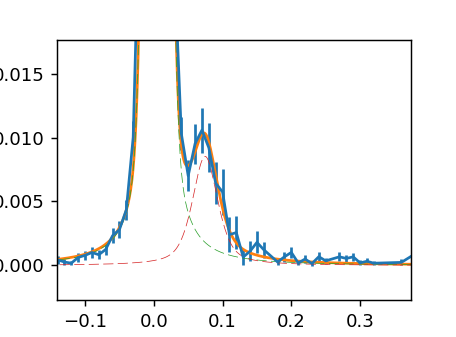

[0.00496335 0.17813455 0.01273512 0.99994956 0.07458164 0.00372332
 0.021829   0.99938492]


In [27]:
# Plot the data fit
plt.figure()
whc = 0 # in idfit
plt.errorbar(x[whc],y[whc],err[whc])
yfit = model[ys[whc]](x_0=xfit, **fit_result.params)
plt.plot(xfit,yfit)

popt = np.array(fit_result.params.values()).reshape(-1,nb_pk[whc]).T.ravel()
print popt
for j in range(nb_pk[whc]):
    plt.plot(xfit, pv_func1(xfit,popt[j*4:(j+1)*4]),'--',lw=0.4) # do not work for multiple files!!!
    
plt.xlim([-0.2,0.4])
#plt.ylim([-0.002,0.02])
plt.show()

In [ ]:
# https://stackoverflow.com/questions/39987105/simultaneous-fitting-python-parameter-sharing/39998622#39998622
from symfit import variables, parameters, Fit

xs = variables('x_1, x_2, x_3, x_4, x_5, x_6')
ys = variables('y_1, y_2, y_3, y_4, y_5, y_6')

a, b = parameters('a, b')
cs = parameters(', '.join('c_{}'.format(i) for i in range(1, 6)))

model_dict = {
    y: a * x**2 + b * x + c
        for x, y, c in zip(xs, ys, cs)
}

fit = Fit(model_dict, x_1=x1_data, x_2=x2_data, ..., y_1=y1_data, ..., sigma_y_1=y1_err, sigma_y_2=y2_err, ...)
fit_result = fit.execute()
print(fit_result)

# Fit the 30-450mK subtracted data <a id='fit_30mk-450mk'></a>

In [49]:
fpath = r'D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/'
fnames=['I-E_3temps_unsub_sub_*_dq_0p2.txt', 'I-E_3temps_unsub_sub_Q[[]220.1[]]dq[[]1.85,2.15[]][[]0.05,0.15[]].txt']
fnames0=[] #index for different files

for fname in fnames:
    for file in os.listdir(fpath):
        if fnmatch.fnmatch(file, fname):      
            print(file)
            fnames0.append(file)

I-E_3temps_unsub_sub_Qhigh[111]area_dq_0p2.txt
I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
I-E_3temps_unsub_sub_Qlow[111]area_dq_0p2.txt
I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt
I-E_3temps_unsub_sub_Q[111]_dq_0p2.txt
I-E_3temps_unsub_sub_Q[22-1]_dq_0p2.txt
I-E_3temps_unsub_sub_Q[220]_dq_0p2.txt
I-E_3temps_unsub_sub_Q[221]_dq_0p2.txt
I-E_3temps_unsub_sub_Q[220.1]dq[1.85,2.15][0.05,0.15].txt


## Loop fit all <a id='30mk-450k_loop_fit_all'></a>

I-E_3temps_unsub_sub_Qhigh[111]area_dq_0p2.txt
`ftol` termination condition is satisfied.
Function evaluations 10, initial cost 1.3837e+05, final cost 2.7869e+01, first-order optimality 2.01e-04.
[-6.29295210e-04  4.93766485e-03  1.91462910e-02  5.78709525e-01
  3.72977390e-04  7.11733650e-02  2.00000000e-02  7.57435400e-01] 
 [2.72576337e-05 7.62342851e-04 1.08773889e-03 6.81807519e-02
 1.43238579e-05 5.53031370e-04 8.44801474e-04 7.26431684e-02]
I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 2.7051e+04, final cost 2.4318e+01, first-order optimality 1.37e-04.
[-6.74051352e-04  1.84249567e-03  1.93181237e-02  5.04484644e-01
  4.01196223e-04  7.08556167e-02  2.00000000e-02  6.11804753e-01] 
 [6.10498141e-05 1.54715852e-03 2.02973773e-03 1.26593508e-01
 3.06307208e-05 1.08181622e-03 1.53110297e-03 1.52936584e-01]
I-E_3temps_unsub_sub_Qlow[111]area_dq_0p2.txt
`ftol` termination condition is satisfied.
Function eva

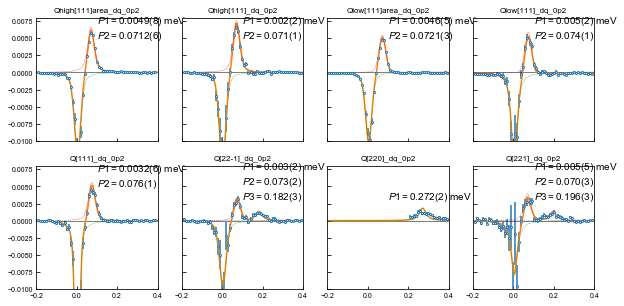

In [33]:
# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [-0.1, -0.01, 0.01, 0],
      [0.0,  0.05, 0.01, 0],
      [0.0,  0.15, 0.01, 0],
      [0.0,  0.2,  0.01, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.02, 1],
      [0.1,0.09, 0.02, 1],
      [0.1,0.20, 0.02, 1],
      [0.1,0.3,  0.02, 1]])
p0s = np.array([
      [-0.012,0,  0.02,0.5],
      [0.001,0.07,0.02,0.5],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.02,0.5]])
# fit which data
usecols = [15,16,17] # 30mK-450mK data
# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]

# Plot and fit
fig, axs = plt.subplots(2,4, figsize=(10,5),sharex=True,sharey=True)
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit
for i in [0,1,2,3,4,5,6,7]:
    f = os.path.join(fpath, fnames0[i])
    print(fnames0[i])
    dat = np.genfromtxt(f, usecols=usecols)
    dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
    dat = fitReg(dat,reg[i])
    x, y, err = dat[:,0],dat[:,1], dat[:,2]
    
    lb = lbs[id_pk[i],:].ravel()
    hb = hbs[id_pk[i],:].ravel()
    p0 = p0s[id_pk[i],:].ravel()

    bounds = [lb, hb]
    N = nb_pk[i]

    popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
                           bounds=bounds, sigma=err, absolute_sigma=True,verbose=1)# if initio value is outside bounds, error
    perr = np.sqrt(np.diag(pcov))
    print(popt,'\n', perr)

    ax = axs[i//4,np.remainder(i,4)]  
    s = fnames0[i]
    ax.set_title(s[s.find('_sub_')+len('_sub_'):s.rfind('.txt')])  
    ax.axhline(y=0, c='black', lw=0.5)
    ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white')
    ax.plot(xfit,wrapper_fit_func_PV(xfit,N,popt))
    for j in np.arange(N):
        ax.plot(xfit, pvoigt(xfit,*popt[j*4:(j+1)*4]),'--',lw=0.4)

    ax.set_xlim([-0.2,0.4])
    ax.set_ylim([-0.01,0.008])

    # Show pars in form of '1.2(1) K' (value(error))
    Nerr = np.abs(np.floor(np.log10(abs(perr)))).astype(int) # get position of the first non-zero digit of the error
    Rerr = [np.round(perr[i],decimals=Nerr[i]) for i in range(len(popt))] # round the error to have only one effective nb
    Serr = np.array(Rerr).astype(str) # convert error to 
    Serr = [np.int(Serr[i][-1]) for i in range(len(popt))] # get the last digit of the error
    
    if N==2:
        ax.text(0.5,0.8,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1])
                +'\n'
                +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                + '({:d})'.format(Serr[5]), 
                transform=ax.transAxes,ha='left',va='bottom')
    elif N==3:
        ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1])
                +'\n'
                +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                + '({:d})'.format(Serr[5])
                +'\n'
                +r'$P3=$'+'{:{width}.{prec}f}'.format(popt[9],width=0,prec=Nerr[9])
                + '({:d})'.format(Serr[9]), 
                transform=ax.transAxes,ha='left',va='bottom')
    elif N==1:
        ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1]), 
                transform=ax.transAxes,ha='left',va='bottom')  
plt.show()    

## Lmfit with/without constrain <a id='30mk-450mk_lmfit'></a>

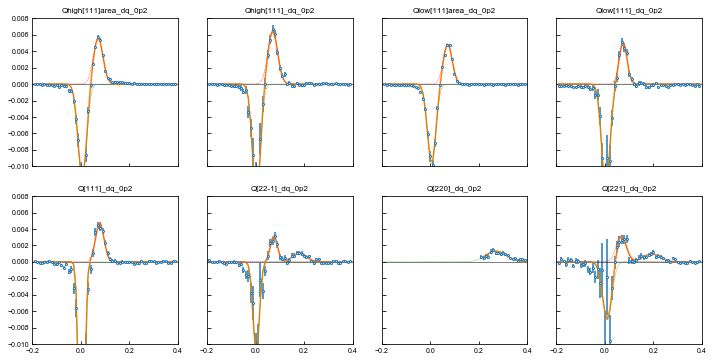

In [34]:
# Use lmfit
import lmfit
from lmfit import minimize, Model, Minimizer, Parameters, Parameter, report_fit

def wrapper_fit_func_PV_lm(x, **params):# varibale nb of PV functions 
    y = 0.0
    v = params
    for i in range(v['nb_pks']):
        y = y + pvoigt(x, v['a{}'.format(i)], v['p{}'.format(i)], v['w{}'.format(i)], v['f{}'.format(i)])
    return y

def residual(params):
        return wrapper_fit_func_PV_lm(x, **params) - y

# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [-0.1, -0.01, 0.01, 0],
      [0.0,  0.06, 0.01, 0],
      [0.0,  0.15, 0.01, 0],
      [0.0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.04, 1],
      [0.1,0.09, 0.03, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [-0.01,0, 0.02,0.],
      [0.005,0.07,0.025,0.],
      [0.012,0.18,0.02,0.],
      [0.001,0.25,0.03,0.]])

# fit which data
usecols = [15,16,17] # 30mK-450mK data
# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]

# Plot and fit
fig, axs = plt.subplots(2,4, figsize=(12,6),sharex=True,sharey=True)
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit
for i in [0,1,2,3,4,5,6,7]:
    f = os.path.join(fpath, fnames0[i])
    #print(fnames0[i])
    dat = np.genfromtxt(f, usecols=usecols)
    dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
    dat = fitReg(dat,reg[i])
    x, y, err = dat[:,0], dat[:,1], dat[:,2]

    params = Parameters()
    N = nb_pk[i]
    #print(N,id_pk[i])
    for idx, j in enumerate(id_pk[i]): 
    # we can set constrait for 0 and 1st peaks: if 0 and 1 in id_pk[i]..., the next cell shows a better way
        params.add('a{}'.format(idx), value=p0s[j,0],min=lbs[j,0],max=hbs[j,0])
        params.add('p{}'.format(idx), value=p0s[j,1],min=lbs[j,1],max=hbs[j,1])
        params.add('w{}'.format(idx), value=p0s[j,2],min=lbs[j,2],max=hbs[j,2])
        params.add('f{}'.format(idx), value=p0s[j,3],min=lbs[j,3],max=hbs[j,3],vary=False)
    params.add('nb_pks', value=N, vary=False)

    mod = Model(wrapper_fit_func_PV_lm, independent_vars=['x'])
#     print mod.param_names
#     print mod.independent_vars
    results = mod.fit(y, params, x=x)
    
#     #create Minimizer
#     mini = lmfit.Minimizer(residual, params, nan_policy='omit')
#     #first solve with Nelder-Mead
#     out1 = mini.minimize(method='Nelder')
#     #then solve with Levenberg-Marquardt using the Nelder-Mead solution as a starting point
#     out2 = mini.minimize(method='leastsq', params=out1.params)
#     print out2.errorbars
#     lmfit.report_fit(out2.params, min_correl=0.5)
#     ci, trace = lmfit.conf_interval(mini, out2, sigmas=[1],trace=True, verbose=False)
#     lmfit.printfuncs.report_ci(ci)
    
    popt = np.array([results.best_values[key] for key in params.keys()])[:-1] # without the last par: nb_pks
    perr = np.array([results.params[key].stderr for key in params.keys()])[:-1]
    #print(results.fit_report())
    #print(popt, perr)
# #     #results.conf_interval(),
# #     #print results.ci_report(ci)

    ax = axs[i//4,np.remainder(i,4)]  
    s = fnames0[i]
    ax.set_title(s[s.find('_sub_')+len('_sub_'):s.rfind('.txt')])  
    ax.axhline(y=0, c='black', lw=0.5)
    ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white')
    #ax.plot(xfit,results.eval(x=xfit,params=results.best_value))
    ax.plot(x,results.best_fit)
    for k in np.arange(N):
        ax.plot(xfit, pvoigt(xfit,*popt[k*4:(k+1)*4]),'--',lw=0.4)

    ax.set_xlim([-0.2,0.4])
    ax.set_ylim([-0.01,0.008])

    # Show pars in form of '1.2(1) K' (value(error))
#     print(perr)
#     Nerr = np.abs(np.floor(np.log10(np.abs(perr)))).astype(int) # get position of the first non-zero digit of the error
#     if results.errorbars: # check if succeed in errorbar or not
#         Rerr = [np.round(perr[i],decimals=Nerr[i]) for i in range(len(popt))] # round the error to have only one effective nb
#     else:
#         continue
#     Serr = np.array(Rerr).astype(str) # convert error to 
#     Serr = [np.int(Serr[i][-1]) for i in range(len(popt))] # get the last digit of the error
    
#     if N==2:
#         ax.text(0.5,0.8,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
#                 + '({:d}) meV'.format(Serr[1])
#                 +'\n'
#                 +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
#                 + '({:d})'.format(Serr[5]), 
#                 transform=ax.transAxes,ha='left',va='bottom')
#     elif N==3:
#         ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
#                 + '({:d}) meV'.format(Serr[1])
#                 +'\n'
#                 +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
#                 + '({:d})'.format(Serr[5])
#                 +'\n'
#                 +r'$P3=$'+'{:{width}.{prec}f}'.format(popt[9],width=0,prec=Nerr[9])
#                 + '({:d})'.format(Serr[9]), 
#                 transform=ax.transAxes,ha='left',va='bottom')
#     elif N==1:
#         ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
#                 + '({:d}) meV'.format(Serr[1]), 
#                 transform=ax.transAxes,ha='left',va='bottom')  
plt.show()    

In [17]:
# Use lmfit with constraits
%matplotlib ipympl
import lmfit
from lmfit import minimize, Model, Minimizer, Parameters, Parameter, report_fit

def wrapper_fit_func_PV_lm(x, **params):# varibale nb of PV functions 
    y = 0.0
    v = params
    for i in id_pk[v['i_id_pk']]:
        y = y + pvoigt(x, v['a{}'.format(i)], v['p{}'.format(i)], v['w{}'.format(i)], v['f{}'.format(i)])
    return y

def residual(params):
        return wrapper_fit_func_PV_lm(x, **params) - y

# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [-0.1, -0.01, 0.01, 0],
      [0.0,  0.06, 0.01, 0],
      [0.0,  0.15, 0.01, 0],
      [0.0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.05, 0.04, 1],
      [0.1,0.09, 0.04, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [-0.01,0.0, 0.02, 0.],
      [0.005,0.075,0.025,0.],
      [0.012,0.18, 0.02, 0.],
      [0.001,0.25, 0.03, 0.]])

# parameter for all the four peaks with p0, min,max and expr, later we will take any we need
params = Parameters()
for j in range(4):
    params.add('a{}'.format(j), value=p0s[j,0],min=lbs[j,0],max=hbs[j,0])
    params.add('p{}'.format(j), value=p0s[j,1],min=lbs[j,1],max=hbs[j,1])
    params.add('w{}'.format(j), value=p0s[j,2],min=lbs[j,2],max=hbs[j,2])
    params.add('f{}'.format(j), value=p0s[j,3],min=lbs[j,3],max=hbs[j,3])
params.add('i_id_pk', value=0, vary=False)
#params['w1'].set(expr='w0') # set constrant for the first and second peaks
params['p0'].set(vary=True) 
params['p1'].set(vary=False) 
for i in range(0,4):
    params['f{}'.format(i)].set(vary=False)

# fit which data
usecols = [15,16,17] # 30mK-450mK data
# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]

# Plot and fit
fig, axs = plt.subplots(2,4, figsize=(12,6),sharex=True,sharey=True)
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit
for i in [0,1,2,3,4,5,6,7]:
    f = os.path.join(fpath, fnames0[i])
    print(fnames0[i])
    dat = np.genfromtxt(f, usecols=usecols)
    dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
    dat = fitReg(dat,reg[i])
    x, y, err = dat[:,0], dat[:,1], dat[:,2]

    N = nb_pk[i]
    
    # only take the used parameter, which makes it possible to calculate error later
    my_params = Parameters() 
    for ii in id_pk[i]:
        my_params['a{}'.format(ii)] = params['a{}'.format(ii)]
        my_params['p{}'.format(ii)] = params['p{}'.format(ii)]
        my_params['w{}'.format(ii)] = params['w{}'.format(ii)]
        my_params['f{}'.format(ii)] = params['f{}'.format(ii)]
    my_params['i_id_pk']= params['i_id_pk']
    
    my_params['i_id_pk'].set(value=i)
 
    mod = Model(wrapper_fit_func_PV_lm, independent_vars=['x'])
#     print mod.param_names
#     print mod.independent_vars
    results = mod.fit(y, my_params, x=x) # if there are pars not altering the fit, the errorbar cannot calculated
        
    popt = np.array([results.best_values[key] for key in my_params.keys()])[:-1] # without the last par: nb_pks
    perr = np.array([results.params[key].stderr for key in my_params.keys()])[:-1]
    #print results.fit_report()
    print(popt, perr)
    #results.conf_interval(),
    #print results.ci_report(ci)

    ax = axs[i//4,np.remainder(i,4)]  
    s = fnames0[i]
    ax.set_title(s[s.find('_sub_')+len('_sub_'):s.rfind('.txt')])  
    ax.axhline(y=0, c='black', lw=0.5)
    ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white')
    #ax.plot(xfit,results.eval(x=xfit,params=results.best_value))
    ax.plot(x,results.best_fit)
    for k in np.arange(N):
        ax.plot(xfit, pvoigt(xfit,*popt[k*4:(k+1)*4]),'--',lw=0.4)

    ax.set_xlim([-0.2,0.4])
    ax.set_ylim([-0.02,0.008])

    # Show pars in form of '1.2(1) K' (value(error))
    #perr[perr==0] = 0.00001 # why not working
    try:
        perr = np.array([perr[i] if perr[i]!=0 else 0.00001  for i in range(len(popt))])
        Nerr = np.abs(np.floor(np.log10(np.abs(perr)))).astype(int) # get position of the first non-zero digit of the error
        Rerr = [np.round(perr[i],decimals=Nerr[i]) if perr[i]!=0 else 0.0001  for i in range(len(popt))] # round the error to have only one effective nb
        Serr = np.array(Rerr).astype(str) # convert error to 
        Serr = [np.int(Serr[i][-1]) for i in range(len(popt))] # get the last digit of the error
        if N==2:
            ax.text(0.5,0.8,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                    + '({:d}) meV'.format(Serr[1])
                    +'\n'
                    +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                    + '({:d})'.format(Serr[5]), 
                    transform=ax.transAxes,ha='left',va='bottom')
        elif N==3:
            ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                    + '({:d}) meV'.format(Serr[1])
                    +'\n'
                    +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                    + '({:d})'.format(Serr[5])
                    +'\n'
                    +r'$P3=$'+'{:{width}.{prec}f}'.format(popt[9],width=0,prec=Nerr[9])
                    + '({:d})'.format(Serr[9]), 
                    transform=ax.transAxes,ha='left',va='bottom')
        elif N==1:
            ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                    + '({:d}) meV'.format(Serr[1]), 
                    transform=ax.transAxes,ha='left',va='bottom')
    except: print('error!')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

I-E_3temps_unsub_sub_Qhigh[111]area_dq_0p2.txt
[-0.00049559  0.00548096  0.02018141  0.          0.00025403  0.075
  0.02018141  0.        ] [1.06312949e-05 4.12070323e-04 4.99115515e-04 0.00000000e+00
 9.28541684e-06 0.00000000e+00 4.99115514e-04 0.00000000e+00]
I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
[-0.00056048  0.0032273   0.01925829  0.          0.00028718  0.075
  0.01925829  0.        ] [2.00196085e-05 6.69618008e-04 7.78488518e-04 0.00000000e+00
 1.75255841e-05 0.00000000e+00 7.78488517e-04 0.00000000e+00]
I-E_3temps_unsub_sub_Qlow[111]area_dq_0p2.txt
[-0.00041198  0.00565485  0.01982301  0.          0.00021162  0.075
  0.01982301  0.        ] [7.78173045e-06 3.58059804e-04 4.30233561e-04 0.00000000e+00
 6.79907837e-06 0.00000000e+00 4.30233562e-04 0.00000000e+00]
I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt
[-0.00053834  0.00378106  0.01974029  0.          0.00021043  0.075
  0.01974029  0.        ] [1.91540248e-05 6.74023587e-04 8.16392837e-04 0.00000000e+00
 1.62270437e-05 

## example

In [ ]:
# https://stackoverflow.com/questions/32386179/creating-a-python-lmfit-model-with-arbitrary-number-of-parameters
import numpy as np
from lmfit import Model, Parameters
def my_poly(x, **params):
    val= 0.0
    parnames = sorted(params.keys())
    for i, pname in enumerate(parnames):
        val += params[pname]*x**i
    return val

my_model = Model(my_poly)
# Parameter names and starting values
params = Parameters()
params.add('C00', value=-10)
params.add('C01', value=  5)
params.add('C02', value=  1)
params.add('C03', value=  0)
params.add('C04', value=  0)

x = np.linspace(-20, 20, 101)
y = -30.4 + 7.8*x - 0.5*x*x + 0.03 * x**3 + 0.009*x**4
y = y + np.random.normal(size=len(y), scale=0.2)

print my_model.param_names
print my_model.independent_vars

out = my_model.fit(y, params, x=x)
print(out.fit_report())

## Fit [22-1], [221] and average <a id='30mk-450mk_fit[221]'></a>

In [178]:
# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [-0.1, -0.01, 0.01, 0],
      [0.0,  0.05, 0.01, 0],
      [0.0,  0.15, 0.01, 0],
      [0.0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.04, 1],
      [0.1,0.09, 0.03, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [-0.012,0,   0.02,0.5],
      [0.001,0.07,0.02,0.5],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.03,0.5]])
# fit which data
usecols = [15,16,17] # 30mK-450mK data
# fit region for different files (only the intermediat energy, the third peak at [221])
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk ]

# Plot and fit
fig, axs = plt.subplots(1,3, figsize=(10,3),sharex=True,sharey=True)
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit
for idx,i in enumerate([5,7,99]):
    if i==99: # combine the two data set
        f = os.path.join(fpath, fnames0[5])
        dat = np.genfromtxt(f, usecols=usecols)
        dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
        dat = fitReg(dat,reg[5])
        x, y, err = dat[:,0],dat[:,1], dat[:,2]
        
        f = os.path.join(fpath, fnames0[7])
        dat = np.genfromtxt(f, usecols=usecols)
        dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
        dat = fitReg(dat,reg[7])
        y, err = (y+dat[:,1])/2., (err**2+dat[:,2]**2)**0.5/2
        
        i = 5
    else:
        f = os.path.join(fpath, fnames0[i])
        print(fnames0[i])
        dat = np.genfromtxt(f, usecols=usecols)
        dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
        dat = fitReg(dat,reg[i])
        x, y, err = dat[:,0],dat[:,1], dat[:,2]
    
    lb = lbs[id_pk[i],:].ravel()
    hb = hbs[id_pk[i],:].ravel()
    p0 = p0s[id_pk[i],:].ravel()

    bounds = [lb, hb]
    N = nb_pk[i]

    popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
                           bounds=bounds, sigma=err, absolute_sigma=True,verbose=1)# if initio value is outside bounds, error
    perr = np.sqrt(np.diag(pcov))
    print(popt,'\n', perr)

    ax = axs[idx]  
    s = fnames0[i]
    ax.set_title(s[s.find('_sub_')+len('_sub_'):s.rfind('.txt')])  
    ax.axhline(y=0, c='black', lw=0.5)
    ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white')
    ax.plot(xfit,wrapper_fit_func_PV(xfit,N,popt))
    for j in np.arange(N):
        ax.plot(xfit, pvoigt(xfit,*popt[j*4:(j+1)*4]),'--',lw=0.4)

    ax.set_xlim([-0.2,0.4])
    ax.set_ylim([-0.01,0.004])

    # Show pars in form of '1.2(1) K' (value(error))
    Nerr = np.abs(np.floor(np.log10(abs(perr)))).astype(int) # get position of the first non-zero digit of the error
    Rerr = [np.round(perr[i],decimals=Nerr[i]) for i in range(len(popt))] # round the error to have only one effective nb
    Serr = np.array(Rerr).astype(str) # convert error to 
    Serr = [np.int(Serr[i][-1]) for i in range(len(popt))] # get the last digit of the error
    
    if N==2:
        ax.text(0.5,0.8,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1])
                +'\n'
                +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                + '({:d})'.format(Serr[5]), 
                transform=ax.transAxes,ha='left',va='bottom')
    elif N==3:
        ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1])
                +'\n'
                +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                + '({:d})'.format(Serr[5])
                +'\n'
                +r'$P3=$'+'{:{width}.{prec}f}'.format(popt[9],width=0,prec=Nerr[9])
                + '({:d})'.format(Serr[9]), 
                transform=ax.transAxes,ha='left',va='bottom')
    elif N==1:
        ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1]), 
                transform=ax.transAxes,ha='left',va='bottom')  
plt.show()    

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

I-E_3temps_unsub_sub_Q[22-1]_dq_0p2.txt
`ftol` termination condition is satisfied.
Function evaluations 25, initial cost 1.3277e+06, final cost 2.1930e+01, first-order optimality 1.03e-03.
[-4.40478578e-04  2.63853371e-03  2.53315324e-02  3.08985597e-01
  1.47949013e-04  7.24031943e-02  2.11883898e-02  5.74682617e-20
  8.39339757e-05  1.81284534e-01  3.45648816e-02  1.01000831e-01] 
 [6.77946947e-05 2.76772295e-03 3.52088580e-03 2.00375432e-01
 5.94499985e-05 2.76430110e-03 3.23506392e-03 1.10548095e+00
 2.86351430e-05 5.52824328e-03 6.72172450e-03 6.77690202e-01]
I-E_3temps_unsub_sub_Q[221]_dq_0p2.txt
`ftol` termination condition is satisfied.
Function evaluations 21, initial cost 1.2195e+06, final cost 2.9651e+01, first-order optimality 5.50e-04.
[-4.99785227e-04  9.61439301e-03  2.02794888e-02  1.00000000e+00
  2.10671137e-04  6.59150357e-02  2.47602776e-02  1.61853329e-23
  1.23606907e-04  1.89407890e-01  5.00000000e-02  3.55502131e-01] 
 [1.12759542e-04 6.67535798e-03 1.20304359e-

## Fit small region for [22-1], [221] and average

I-E_3temps_unsub_sub_Q[22-1].txt
`ftol` termination condition is satisfied.
Function evaluations 21, initial cost 1.3202e+06, final cost 1.2458e+01, first-order optimality 3.25e-04.
[7.85387592e-05 1.81247617e-01 3.48840934e-02 8.99386688e-03] 
[1.71088506e-05 4.25275835e-03 5.54283399e-03 6.63048340e-01]
I-E_3temps_unsub_sub_Q[221].txt
`ftol` termination condition is satisfied.
Function evaluations 22, initial cost 1.2239e+06, final cost 1.3523e+01, first-order optimality 1.61e-05.
[9.39503823e-05 1.91698637e-01 4.89943973e-02 2.93029225e-13] 
[1.86053626e-05 6.14542760e-03 7.60085438e-03 5.88485349e-01]
`ftol` termination condition is satisfied.
Function evaluations 20, initial cost 2.5362e+06, final cost 1.0361e+01, first-order optimality 5.37e-05.
[8.85452443e-05 1.85832122e-01 4.06892523e-02 1.39128633e-01] 
[1.25957135e-05 3.64835197e-03 4.82056701e-03 4.15526544e-01]


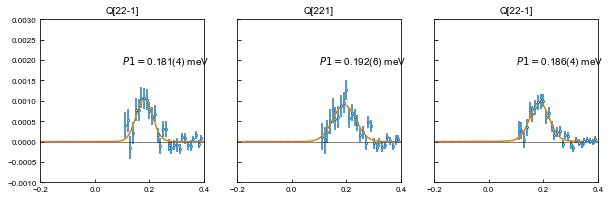

In [106]:
# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [-0.1, -0.01, 0.01, 0],
      [0.0,  0.05, 0.01, 0],
      [0.0,  0.15, 0.01, 0],
      [0.0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.04, 1],
      [0.1,0.09, 0.03, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [-0.012,0,   0.02,0.5],
      [0.001,0.07,0.02,0.5],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.03,0.5]])
# fit which data
usecols = [15,16,17] # 30mK-450mK data
# fit region for different files (only the intermediat energy, the third peak at [221])
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.1,0.4],[0.2,0.4],[0.1,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [2], [3], [2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk ]

# Plot and fit
fig, axs = plt.subplots(1,3, figsize=(10,3),sharex=True,sharey=True)
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit
for idx,i in enumerate([5,7,99]):
    if i==99: # combine the two data set
        f = os.path.join(fpath, fnames0[5])
        dat = np.genfromtxt(f, usecols=usecols)
        dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
        dat = fitReg(dat,reg[5])
        x, y, err = dat[:,0],dat[:,1], dat[:,2]
        
        f = os.path.join(fpath, fnames0[7])
        dat = np.genfromtxt(f, usecols=usecols)
        dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
        dat = fitReg(dat,reg[7])
        y, err = (y+dat[:,1])/2., (err**2+dat[:,2]**2)**0.5/2
        
        i = 5
    else:
        f = os.path.join(fpath, fnames0[i])
        print fnames0[i]
        dat = np.genfromtxt(f, usecols=usecols)
        dat = dat[dat[:,2]!=0,:] # remove the data with zero error to avoid fitting failure
        dat = fitReg(dat,reg[i])
        x, y, err = dat[:,0],dat[:,1], dat[:,2]
    
    lb = lbs[id_pk[i],:].ravel()
    hb = hbs[id_pk[i],:].ravel()
    p0 = p0s[id_pk[i],:].ravel()

    bounds = [lb, hb]
    N = nb_pk[i]

    popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
                           bounds=bounds, sigma=err, absolute_sigma=True,verbose=1)# if initio value is outside bounds, error
    perr = np.sqrt(np.diag(pcov))
    print popt,'\n', perr

    ax = axs[idx]  
    s = fnames0[i]
    ax.set_title(s[s.find('_sub_')+len('_sub_'):s.rfind('.txt')])  
    ax.axhline(y=0, c='black', lw=0.5)
    ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white')
    ax.plot(xfit,wrapper_fit_func_PV(xfit,N,popt))
    for j in np.arange(N):
        ax.plot(xfit, pvoigt(xfit,*popt[j*4:(j+1)*4]),'--',lw=0.4)

    ax.set_xlim([-0.2,0.4])
    ax.set_ylim([-0.001,0.003])

    # Show pars in form of '1.2(1) K' (value(error))
    Nerr = np.abs(np.floor(np.log10(abs(perr)))).astype(int) # get position of the first non-zero digit of the error
    Rerr = [np.round(perr[i],decimals=Nerr[i]) for i in range(len(popt))] # round the error to have only one effective nb
    Serr = np.array(Rerr).astype(str) # convert error to 
    Serr = [np.int(Serr[i][-1]) for i in range(len(popt))] # get the last digit of the error
    
    if N==2:
        ax.text(0.5,0.8,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1])
                +'\n'
                +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                + '({:d})'.format(Serr[5]), 
                transform=ax.transAxes,ha='left',va='bottom')
    elif N==3:
        ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1])
                +'\n'
                +r'$P2=$'+'{:{width}.{prec}f}'.format(popt[5],width=0,prec=Nerr[5])
                + '({:d})'.format(Serr[5])
                +'\n'
                +r'$P3=$'+'{:{width}.{prec}f}'.format(popt[9],width=0,prec=Nerr[9])
                + '({:d})'.format(Serr[9]), 
                transform=ax.transAxes,ha='left',va='bottom')
    elif N==1:
        ax.text(0.5,0.7,r'$P1=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
                + '({:d}) meV'.format(Serr[1]), 
                transform=ax.transAxes,ha='left',va='bottom')  
plt.show()    

# Plot 30mk-20K I-E at Qs  <a id='30mk-20k_plot'></a>

## Separately plot

I-E_3temps_unsub_sub_Qhigh[111]area_dq_0p2.txt


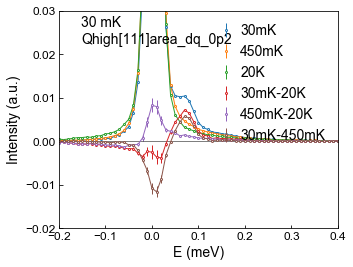

I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt


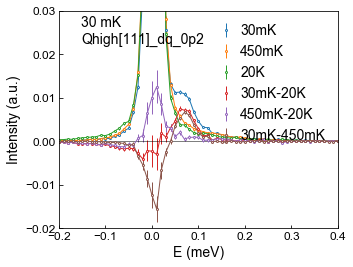

I-E_3temps_unsub_sub_Qlow[111]area_dq_0p2.txt


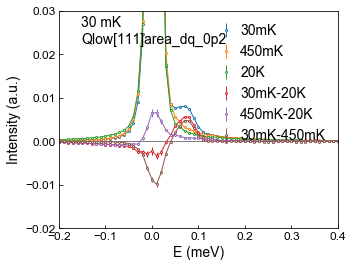

I-E_3temps_unsub_sub_Qlow[111]_dq_0p2.txt


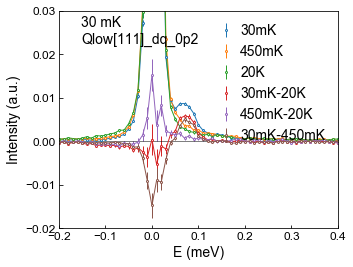

I-E_3temps_unsub_sub_Q[111]_dq_0p2.txt


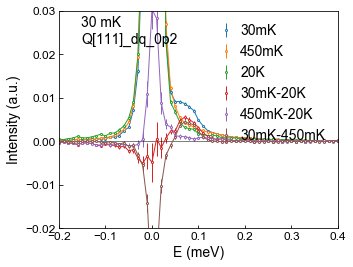

I-E_3temps_unsub_sub_Q[22-1]_dq_0p2.txt


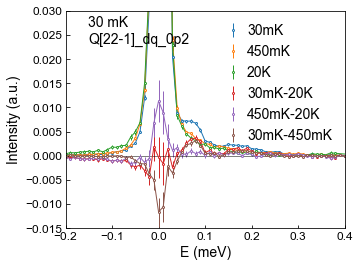

I-E_3temps_unsub_sub_Q[220]_dq_0p2.txt


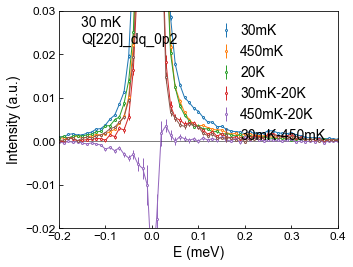

I-E_3temps_unsub_sub_Q[221]_dq_0p2.txt


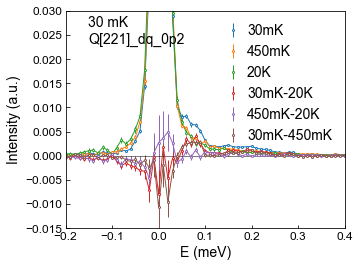

In [161]:
# Export figures
%matplotlib inline
from scipy import interpolate

legs = ['30mK','450mK','20K','30mK-20K','450mK-20K','30mK-450mK']
ylims = [[-0.02,0.03],[-0.02,0.03],[-0.02,0.03],[-0.02,0.03],[-0.02,0.03],[-0.015,0.03],[-0.02,0.03],[-0.015,0.03]]
for i in [0,1,2,3,4,5,6,7]:
    f = os.path.join(fpath, fnames0[i])
    print(fnames0[i])
    dat = np.genfromtxt(f)

    fig, ax = plt.subplots(1,1, figsize=(5,4),sharex=True,sharey=True)
    s = fnames0[i]
    text = s[s.find('_sub_')+len('_sub_'):s.rfind('.txt')]
    ax.text(0.08,0.85,'30 mK\n'+text, fontsize=14, transform=ax.transAxes)
    ax.axhline(y=0, c='black', lw=0.5)
    
    for j in [0,1,2,3,4,5]:
        xye = dat[:,j*3:j*3+3]
        xye = xye[xye[:,2]!=0,:] # remove the data with zero error to avoid spl failure
        x, y, err = xye[:,0],xye[:,1], xye[:,2]
        lines, _, _ = ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white',lw=1,label=legs[j])
        spl = interpolate.UnivariateSpline(x, y, s=0.0000)
        ax.plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)

    ax.set_xlim([-0.2,0.4])
    ax.set_ylim(ylims[i])

    ax.set_xlabel('E (meV)',size=14)
    ax.set_ylabel('Intensity (a.u.)',size=14)

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    plt.legend(loc=1,fontsize=14,frameon=False,handletextpad=0.)
    #fig.savefig(f.replace('.txt','_all.pdf'),bbox_inches="tight",verbose=True)
    plt.show()    

## Two and four subplots @ (111) & (220)

I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt


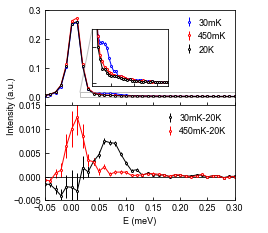

I-E_3temps_unsub_sub_Q[220.1]dq[1.85,2.15][0.05,0.15].txt


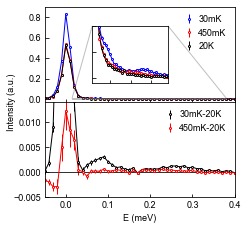

In [8]:
# Export figures
from scipy import interpolate
from mpl_toolkits.axes_grid.inset_locator import inset_axes
latexify(fig_height=3.5)
legs = ['30mK','450mK','20K','30mK-20K','450mK-20K','30mK-450mK']
cols = ['blue','red','black','black','red','blue']
xlims   = [[-0.1,0.3],     [-0.05,0.3],    [-0.1,0.3],     [-0.1,0.3],     [-0.1,0.3],     [-0.1,0.3],    [-0.1,0.3],      [-0.1,0.3],     [-0.05,0.4]]
ylims0  = [[-0.05,0.3],    [-0.03,0.3],    [-0.05,0.3],    [-0.05,0.3],    [-0.05,0.3],    [-0.05,0.3],   [-0.05,0.3],     [-0.05,0.3],    [-0.03,0.9]]
ylims1  = [[-0.02,0.03],   [-0.005,0.015], [-0.02,0.03],   [-0.02,0.03],   [-0.02,0.03],   [-0.015,0.03], [-0.02,0.03],    [-0.015,0.03],  [-0.005,0.014]]
inxlims = [[0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35], [0.015, 0.35],   [0.015, 0.35],  [0.015, 0.38]]
inylims = [[-0.001, 0.012],[-0.001, 0.015],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.01]]
for i in [1,8]:
    f = os.path.join(fpath, fnames0[i])
    print(fnames0[i])
    dat = np.genfromtxt(f)

    fig, axs = plt.subplots(2,1,sharex=True)
    axins = axs[0].inset_axes([0.25, 0.2, 0.4, 0.6])
    axs[1].axhline(y=0, c='black', lw=0.8)
    for j in [0,1,2,3,4,5]:
        xye = dat[:,j*3:j*3+3]
        xye = xye[xye[:,2]!=0,:] # remove the data with zero error to avoid spl failure
        x, y, err = xye[:,0],xye[:,1], xye[:,2]
        spl = interpolate.UnivariateSpline(x, y, s=0.0000)
        if j in [0,1,2]:
            lines, _, _ = axs[0].errorbar(x, y, err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white', lw=1, label=legs[j])
            axs[0].plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)
            axins.errorbar(x, y, err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white', lw=1, label=legs[j])
            axins.plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)
        elif j in [3,4]:
            lines, _, _ = axs[1].errorbar(x, y, err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white',lw=1,label=legs[j])
            axs[1].plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)
            
    axs[0].set_yscale('linear', nonposy='clip')
    axs[0].set_ylim(ylims0[i])
    
    axs[1].set_xlim(xlims[i])
    axs[1].set_ylim(ylims1[i])

    axs[1].set_xlabel('E (meV)')
    #axs[1].set_ylabel('Intensity (a.u.)')
    axs[0].set_ylabel('Intensity (a.u.)')
    axs[0].yaxis.set_label_coords(-0.15, 0.)

    axs[0].legend(loc=1,frameon=False,handletextpad=0.)
    axs[1].legend(loc=1,frameon=False,handletextpad=0.)
    
    fig.subplots_adjust(wspace=0, hspace=0)

    # region for the inset
    axins.set_xlim(inxlims[i])
    axins.set_ylim(inylims[i])
    axins.set_xticklabels('')
    axins.set_yticklabels('')
    axs[0].indicate_inset_zoom(axins)
    
    #fig.savefig(f.replace('.txt','_all.pdf'),bbox_inches="tight",pad_inches=0,verbose=True)
    plt.show()    

## Four subplots

I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
I-E_3temps_unsub_sub_Q[220.1]dq[1.85,2.15][0.05,0.15].txt


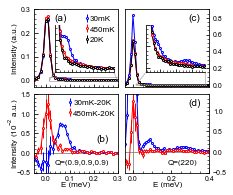

In [52]:
# Export figures: four pannels for (111) and (220)
%matplotlib inline
from scipy import interpolate
from mpl_toolkits.axes_grid.inset_locator import inset_axes
latexify(fig_height=3,fig_width=3.15)
legs = ['30mK','450mK','20K','30mK-20K','450mK-20K','30mK-450mK']
cols = ['blue','red','black','blue','red','blue']
xlims   = [[-0.1,0.3],     [-0.05,0.3],    [-0.1,0.3],     [-0.1,0.3],     [-0.1,0.3],     [-0.1,0.3],    [-0.1,0.3],      [-0.1,0.3],     [-0.04,0.4]]
ylims0  = [[-0.05,0.3],    [-0.03,0.3],    [-0.05,0.3],    [-0.05,0.3],    [-0.05,0.3],    [-0.05,0.3],   [-0.05,0.3],     [-0.05,0.3],    [-0.03,0.9]]
ylims1  = [[-0.02,0.03],   [-0.005,0.015], [-0.02,0.03],   [-0.02,0.03],   [-0.02,0.03],   [-0.015,0.03], [-0.02,0.03],    [-0.015,0.03],  [-0.005,0.014]]
inxlims = [[0.015, 0.35],  [0.015, 0.3],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35], [0.015, 0.35],   [0.015, 0.35],  [0.015, 0.38]]
inylims = [[-0.001, 0.012],[-0.001, 0.015],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.01]]

# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
# pylab.rcParams.update(params)

params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'xtick.labelsize':7,
         'ytick.labelsize':7 }
mpl.rcParams.update(params)

fig, axs = plt.subplots(2,2,sharex='col')
texts = ['(a)','(b)','(c)','(d)']
tposs = np.array([[0.25,0.85],[0.75,0.4],[0.75,0.85],[0.75,0.85]])
for idx, i in enumerate([1,8]):
    f = os.path.join(fpath, fnames0[i])
    print(fnames0[i])
    dat = np.genfromtxt(f)
    
    axins = axs[0,idx].inset_axes([0.25, 0.2, 0.7, 0.6])
    axs[1,idx].axhline(y=0, c='grey', lw=0.8,zorder=0)
    #axs[0,idx].axvline(x=0, c='black', lw=0.8)
    axs[1,idx].axvline(x=0, c='grey', lw=0.8,zorder=0)
    for j in [0,1,2,3,4,5]:
        xye = dat[:,j*3:j*3+3]
        xye = xye[xye[:,2]!=0,:] # remove the data with zero error to avoid spl failure
        x, y, err = xye[:,0],xye[:,1], xye[:,2]
        spl = interpolate.UnivariateSpline(x, y, s=0.0000)
        if j in [0,1,2]:
            lines, _, _ = axs[0,idx].errorbar(x, y, err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white', lw=1, label=legs[j])
            axs[0,idx].plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)
            axins.errorbar(x, y, err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white', lw=1, label=legs[j])
            axins.plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)
        elif j in [3,4]:
            lines, _, _ = axs[1,idx].errorbar(x, 100*y, 100*err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white',lw=1,label=legs[j])
            axs[1,idx].plot(x, 100*spl(x), ls='-',c=lines.get_color(),lw=1)
            
    axs[0,idx].set_yscale('linear', nonposy='clip')
    axs[0,idx].set_ylim(ylims0[i])
    
    axs[1,idx].set_xlim(xlims[i])
    axs[1,idx].set_ylim(ylims1[i][0]*100,ylims1[i][1]*100)

    axs[1,idx].set_xlabel('E (meV)',labelpad=-0.2)
    #axs[1,idx].tick_params(axis='x', which='minor', bottom=True)
    
    axs[0,idx].minorticks_on()
    axs[1,idx].minorticks_on()
    #axs[1].set_ylabel('Intensity (a.u.)')
#     if idx==0: # only set one ylabel
#         axs[0,idx].set_ylabel('Intensity (a.u.)')
#         axs[0,idx].yaxis.set_label_coords(-0.3, 0.)

    axs[0,0].set_ylabel('Intensity (a.u.)',labelpad=2.)
    axs[1,0].set_ylabel('Intensity ($10^{-2}$ a.u.)',labelpad=-6)
    
    if idx==0:
        axs[0,idx].legend(loc=[0.5,0.53],frameon=False,handletextpad=-0.6,fontsize=8)
        axs[1,idx].legend(loc=[0.3,0.68],frameon=False,handletextpad=-0.6,fontsize=8)
    if idx==1:
        axs[0,idx].yaxis.tick_right()
        axs[1,idx].yaxis.tick_right()
    fig.subplots_adjust(wspace=0.09, hspace=0.09)

    # region for the inset
    axins.minorticks_on()
    axins.set_xlim(inxlims[i])
    axins.set_ylim(inylims[i])
    axins.set_xticklabels('')
    axins.set_yticklabels('')
    axins.spines['right'].set_visible(False)
    axins.spines['top'].set_visible(False)
    if idx==0:
        rectpatch, connects=axs[0,idx].indicate_inset_zoom(axins)
        connects[0].set_visible(True)
        connects[1].set_visible(False)
        connects[2].set_visible(True)
        connects[3].set_visible(False)
    else:
        rectpatch, connects=axs[0,idx].indicate_inset_zoom(axins)
        connects[0].set_visible(True)
        connects[1].set_visible(False)
        connects[2].set_visible(True)
        connects[3].set_visible(False)    
axs[0,0].text(tposs[0,0],tposs[0,1],texts[0],fontsize=10, transform=axs[0,0].transAxes)
axs[1,0].text(tposs[1,0],tposs[1,1],texts[1],fontsize=10, transform=axs[1,0].transAxes)
axs[0,1].text(tposs[2,0],tposs[2,1],texts[2],fontsize=10, transform=axs[0,1].transAxes)
axs[1,1].text(tposs[3,0],tposs[3,1],texts[3],fontsize=10, transform=axs[1,1].transAxes)

axs[1,0].text(0.25,0.1,'Q=(0.9,0.9,0.9)',fontsize=8, transform=axs[1,0].transAxes)
axs[1,1].text(0.5,0.1,'Q=(220)',fontsize=8, transform=axs[1,1].transAxes)
#fig.savefig(f.replace('.txt','_4subpplots.pdf'),bbox_inches="tight",pad_inches=0,verbose=True)
plt.show()

## Four Subplots with 450-30mK subtraction

I-E_3temps_unsub_sub_Qhigh[111]_dq_0p2.txt
[-7.13724100e-04  3.01371222e-03  1.96754930e-02  5.84586256e-01
  4.30430755e-04  6.96892505e-02  2.33107634e-02  5.06112263e-01] 
 [6.68131414e-05 1.66034002e-03 2.34079961e-03 1.55209888e-01
 4.08164311e-05 1.37196305e-03 1.83879937e-03 2.00706549e-01]
I-E_3temps_unsub_sub_Q[220.1]dq[1.85,2.15][0.05,0.15].txt


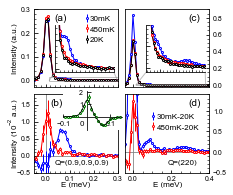

In [124]:
# Export figures: four pannels for (111) and (220)
###################### Fitting parameter for 111 450-30mK data （copied from 3.1）##################
# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [-0.1, -0.01, 0.01, 0],
      [0.0,  0.05, 0.01, 0],
      [0.0,  0.15, 0.01, 0],
      [0.0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.04, 1],
      [0.1,0.09, 0.03, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [-0.012,0,   0.02,0.5],
      [0.001,0.07,0.02,0.5],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.03,0.5]])
# fit which data
usecols = [15,16,17] # 30mK-450mK data
# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit
####################################################################################################

%matplotlib inline
#%matplotlib inline
from scipy import interpolate
from mpl_toolkits.axes_grid.inset_locator import inset_axes
latexify(fig_height=3,fig_width=3.15)
legs = ['30mK','450mK','20K','30mK-20K','450mK-20K','450mK-30mK']
cols = ['blue','red','black','blue','red','green']
xlims   = [[-0.1,0.3],     [-0.05,0.3],     [-0.1,0.3],     [-0.1,0.3],     [-0.1,0.3],     [-0.1,0.3],    [-0.1,0.3],      [-0.1,0.3],     [-0.04,0.4]]
ylims0  = [[-0.05,0.3],    [-0.03,0.3],    [-0.05,0.3],    [-0.05,0.3],    [-0.05,0.3],    [-0.05,0.3],   [-0.05,0.3],     [-0.05,0.3],    [-0.03,0.9]]
ylims1  = [[-0.02,0.03],   [-0.005,0.018], [-0.02,0.03],   [-0.02,0.03],   [-0.02,0.03],   [-0.015,0.03], [-0.02,0.03],    [-0.015,0.03],  [-0.005,0.014]]
inxlims = [[0.015, 0.35],  [0.015, 0.3],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35], [0.015, 0.35],   [0.015, 0.35],  [0.015, 0.38]]
inylims = [[-0.001, 0.012],[-0.001, 0.015],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.01]]

# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
# pylab.rcParams.update(params)

params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'xtick.labelsize':7,
         'ytick.labelsize':7 }
mpl.rcParams.update(params)

fig, axs = plt.subplots(2,2,sharex='col')#,figsize=(6,6))
texts = ['(a)','(b)','(c)','(d)']
tposs = np.array([[0.25,0.85],[0.2,0.85],[0.75,0.85],[0.75,0.85]])
for idx, i in enumerate([1,8]):
    f = os.path.join(fpath, fnames0[i])
    print(fnames0[i])
    dat = np.genfromtxt(f)
    
    axins = axs[0,idx].inset_axes([0.25, 0.2, 0.7, 0.6])
   
    axs[1,idx].axhline(y=0, c='grey', lw=0.8,zorder=0)
    #axs[0,idx].axvline(x=0, c='black', lw=0.8)
    axs[1,idx].axvline(x=0, c='grey', lw=0.8,zorder=0)
    for j in [0,1,2,3,4,5]:
        xye = dat[:,j*3:j*3+3]
        xye = xye[xye[:,2]!=0,:] # remove the data with zero error to avoid spl failure
        x, y, err = xye[:,0],xye[:,1], xye[:,2]
        spl = interpolate.UnivariateSpline(x, y, s=0.0000)
        if j in [0,1,2]:
            lines, _, _ = axs[0,idx].errorbar(x, y, err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white', lw=1, label=legs[j])
            axs[0,idx].plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)
            axins.errorbar(x, y, err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white', lw=1, label=legs[j])
            axins.plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)
        elif j in [3,4]:
                lines, _, _ = axs[1,idx].errorbar(x, 100*y, 100*err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white',lw=1,label=legs[j])
                axs[1,idx].plot(x, 100*spl(x), ls='-',c=lines.get_color(),lw=1)
        if (i==1 and j==5): # also plot 450-30mK (added minius sign)
            xye = fitReg(xye, (-0.1,0.15))
            x, y, err = xye[:,0], xye[:,1], xye[:,2]
            #print(x,y,err)
            # Do the fit
            lb = lbs[id_pk[0],:].ravel()
            hb = hbs[id_pk[0],:].ravel()
            p0 = p0s[id_pk[0],:].ravel()
            bounds = [lb, hb]
            N = 2
            
            popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
                                   bounds=bounds, sigma=err, absolute_sigma=True,verbose=0)# if initio value is outside bounds, error
            perr = np.sqrt(np.diag(pcov))
            print(popt,'\n', perr)
            
            axins0 = axs[1,0].inset_axes([0.35, 0.55, 0.7, 0.5]); axins0.patch.set_alpha(1)
            lines, _, _ = axins0.errorbar(x, -100*y, 100*err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white',lw=1,label=legs[j],zorder=9)
            axins0.plot(xfit, -100*wrapper_fit_func_PV(xfit, N, popt),'-',c='black',lw=0.8,zorder=10)   
#             if N!=1:
#                 for j in np.arange(0,N):
#                     axins0.plot(xfit, -100*pvoigt(xfit,*popt[j*4:(j+1)*4]),'-',lw=0.4)
            #spine placement data centered
            axins0.spines['left'].set_position(('data', 0.0))
            axins0.spines['bottom'].set_position(('data', 0.0))
            axins0.spines['right'].set_color('none')
            axins0.spines['top'].set_color('none')        
            axins0.set_xlim([-0.1,0.15]); axins0.set_xticks([-0.1,0.1])
            axins0.set_ylim([-1,2.1]); axins0.set_yticks([1,2])
            axins0.text(-0.03,-0.7, '0')
            
    axs[0,idx].set_yscale('linear', nonposy='clip')
    axs[0,idx].set_ylim(ylims0[i])
    
    axs[1,idx].set_xlim(xlims[i])
    axs[1,idx].set_ylim(ylims1[i][0]*100,ylims1[i][1]*100)

    axs[1,idx].set_xlabel('E (meV)',labelpad=-0.2)
    #axs[1,idx].tick_params(axis='x', which='minor', bottom=True)
    
    axs[0,idx].minorticks_on()
    axs[1,idx].minorticks_on()
    #axs[1].set_ylabel('Intensity (a.u.)')
#     if idx==0: # only set one ylabel
#         axs[0,idx].set_ylabel('Intensity (a.u.)')
#         axs[0,idx].yaxis.set_label_coords(-0.3, 0.)

    # region for the inset
    axins.minorticks_on()
    axins.set_xlim(inxlims[i])
    axins.set_ylim(inylims[i])
    
    axins.set_xticklabels('')
    axins.set_yticklabels('')
    axins.spines['right'].set_visible(False)
    axins.spines['top'].set_visible(False)

    if idx==0:
        rectpatch, connects=axs[0,idx].indicate_inset_zoom(axins)
        connects[0].set_visible(True)
        connects[1].set_visible(False)
        connects[2].set_visible(True)
        connects[3].set_visible(False)
    else:
        rectpatch, connects=axs[0,idx].indicate_inset_zoom(axins)
        connects[0].set_visible(True)
        connects[1].set_visible(False)
        connects[2].set_visible(True)
        connects[3].set_visible(False)  

axs[0,0].set_ylabel('Intensity (a.u.)',labelpad=2.)
axs[1,0].set_ylabel('Intensity ($10^{-2}$ a.u.)',labelpad=-6)

leg_handles, leg_labels = axs[0,0].get_legend_handles_labels()
axs[0,0].legend(leg_handles[1:], leg_labels[1:], loc=[0.5,0.53],frameon=False,handletextpad=-0.6,fontsize=8)
#axs[1,0].legend(loc=[0.3,0.68],frameon=False,handletextpad=-0.6,fontsize=8)
axs[1,1].legend(loc=[0.2,0.5],frameon=False,handletextpad=-0.6,fontsize=8)

axs[0,1].yaxis.tick_right()
axs[1,1].yaxis.tick_right()
fig.subplots_adjust(wspace=0.09, hspace=0.09)

axs[0,0].text(tposs[0,0],tposs[0,1],texts[0],fontsize=10, transform=axs[0,0].transAxes)
axs[1,0].text(tposs[1,0],tposs[1,1],texts[1],fontsize=10, transform=axs[1,0].transAxes)
axs[0,1].text(tposs[2,0],tposs[2,1],texts[2],fontsize=10, transform=axs[0,1].transAxes)
axs[1,1].text(tposs[3,0],tposs[3,1],texts[3],fontsize=10, transform=axs[1,1].transAxes)

axs[1,0].text(0.25,0.1,'Q=(0.9,0.9,0.9)',fontsize=8, transform=axs[1,0].transAxes)
axs[1,1].text(0.5,0.1,'Q=(220)',fontsize=8, transform=axs[1,1].transAxes)
#fig.savefig(f.replace('.txt','_4subpplots1.pdf'),bbox_inches="tight",pad_inches=0,verbose=True)
plt.show()

## Four subplots with 450-30mK subatraction: no whole peak no inset

In [6]:
fpath = r'D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/'
fnames00=['I-E_3temps_unsub_Q_alongArm_Dq0p1_fineEBin.txt','I-E_3temps_unsub_sub_Q[220.1]dq[1.85,2.15][0.05,0.15]_fineEBin.txt',
          'I-E_3temps_unsub_Q_alongArm_Dq0p1.txt',
          'I-E_3temps_unsub_sub_Q[220.1]dq[1.85,2.15][0.05,0.15].txt']

I-E_3temps_unsub_Q_alongArm_Dq0p1.txt
I-E_3temps_unsub_sub_Q[220.1]dq[1.85,2.15][0.05,0.15].txt


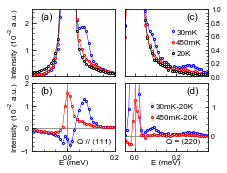

In [16]:
# Export figures: four pannels for (111) and (220)
###################### Fitting parameter for 111 450-30mK data （copied from 3.1）##################
# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [-0.1, -0.01, 0.01, 0],
      [0.0,  0.05, 0.01, 0],
      [0.0,  0.15, 0.01, 0],
      [0.0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.04, 1],
      [0.1,0.09, 0.03, 1],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [-0.012,0,   0.02,0.5],
      [0.001,0.07,0.02,0.5],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.03,0.5]])
# fit which data
usecols = [15,16,17] # 30mK-450mK data
# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit
####################################################################################################

%matplotlib ipympl
%matplotlib ipympl
%matplotlib inline
from scipy import interpolate
from mpl_toolkits.axes_grid.inset_locator import inset_axes
latexify(fig_height=2.6,fig_width=3.15)
legs = ['30mK','450mK','20K','30mK-20K','450mK-20K','450mK-30mK']
cols = ['blue','red','black','blue','red','green']
xlims   = [[-0.15,0.2],     [-0.05,0.35],     [-0.1,0.3],     [-0.1,0.3],     [-0.1,0.3],     [-0.1,0.3],    [-0.1,0.3],      [-0.1,0.3],     [-0.04,0.4]]
ylims0  = [[-0.0,0.025],    [-0.0,0.01],    [-0.05,0.3],    [-0.05,0.3],    [-0.05,0.3],    [-0.05,0.3],   [-0.05,0.3],     [-0.05,0.3],    [-0.03,0.9]]
ylims1  = [[-0.01,0.02],   [-0.005,0.018], [-0.02,0.03],   [-0.02,0.03],   [-0.02,0.03],   [-0.015,0.03], [-0.02,0.03],    [-0.015,0.03],  [-0.005,0.014]]
inxlims = [[0.015, 0.35],  [0.015, 0.3],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35], [0.015, 0.35],   [0.015, 0.35],  [0.015, 0.38]]
inylims = [[-0.001, 0.012],[-0.001, 0.015],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.01]]

# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
# pylab.rcParams.update(params)

params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'xtick.labelsize':7,
         'ytick.labelsize':7 }
mpl.rcParams.update(params)

fig, axs = plt.subplots(2,2,sharex='col')#,figsize=(6,6))
texts = ['(a)','(b)','(c)','(d)']
tposs = np.array([[0.1,0.85],[0.1,0.85],[0.75,0.85],[0.75,0.85]])
for idx, i in enumerate([2,3]):
    f = os.path.join(fpath, fnames00[i])
    print(fnames00[i])
    dat = np.genfromtxt(f)
   
    axs[1,idx].axhline(y=0, c='grey', lw=0.8,zorder=0)
    #axs[0,idx].axvline(x=0, c='black', lw=0.8)
    axs[1,idx].axvline(x=0, c='grey', lw=0.8,zorder=0)
    for j in [0,1,2,3,4,5]:
        xye = dat[:,j*3:j*3+3]
        xye = xye[xye[:,2]!=0,:] # remove the data with zero error to avoid spl failure
        x, y, err = xye[:,0],xye[:,1], xye[:,2]
        spl = interpolate.UnivariateSpline(x, y, s=0.0000)
        if j in [0,1,2]:
            lines, _, _ = axs[0,idx].errorbar(x, 100*y, 100*err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white', lw=0.3, label=legs[j])
            axs[0,idx].plot(x, 100*spl(x), ls='-',c=lines.get_color(),lw=0.5)
            if i==None: pass # zoomed inset
                #axins = axs[i,idx].inset_axes([0.55, 0.6, 0.7, 0.6])
                #axins.errorbar(x, y, err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white', lw=1, label=legs[j])
                #axins.plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)
        elif j in [3,4]:
                lines, _, _ = axs[1,idx].errorbar(x, 100*y, 100*err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white',lw=0.3,label=legs[j])
                axs[1,idx].plot(x, 100*spl(x), ls='-',c=lines.get_color(),lw=0.5)
#         if (idx== 0 and j==5): # also plot 450-30mK (added minius sign)
#             axins0 = axs[1,0].inset_axes([0.65, 0.65, 0.4, 0.4]); axins0.patch.set_alpha(1)
#             xye = fitReg(xye, (-0.1,0.1))
#             x, y, err = xye[:,0], xye[:,1], xye[:,2]
#             #print(x,y,err)
#             # Do the fit
#             lb = lbs[id_pk[0],:].ravel()
#             hb = hbs[id_pk[0],:].ravel()
#             p0 = p0s[id_pk[0],:].ravel()
#             bounds = [lb, hb]
#             N = 2
            
#             popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
#                                    bounds=bounds, sigma=err, absolute_sigma=True,verbose=0)# if initio value is outside bounds, error
#             perr = np.sqrt(np.diag(pcov))
#             print(popt,'\n', perr)
            
#             lines, _, _ = axins0.errorbar(x, -100*y, 100*err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white',lw=1,label=legs[j],zorder=9)
#             axins0.plot(xfit, -100*wrapper_fit_func_PV(xfit, N, popt),'-',c='black',lw=0.8,zorder=10)   
#             if N!=1:
#                 for j in np.arange(0,N):
#                     axins0.plot(xfit, -100*pvoigt(xfit,*popt[j*4:(j+1)*4]),'-',lw=0.4)
#             #spine placement data centered
#             axins0.spines['left'].set_position(('data', 0.0))
#             axins0.spines['bottom'].set_position(('data', 0.0))
#             axins0.spines['right'].set_color('none')
#             axins0.spines['top'].set_color('none')        
#             axins0.set_xlim([-0.1,0.15]); axins0.set_xticks([-0.1,0.1])
#             axins0.set_ylim([-1,2.1]); axins0.set_yticks([1,2])
#             axins0.text(-0.03,-0.7, '0')
            
    axs[0,idx].set_yscale('linear', nonposy='clip')
    axs[0,idx].set_ylim(ylims0[idx][0]*100,ylims0[idx][1]*100)
    
    axs[1,idx].set_xlim(xlims[idx])
    axs[1,idx].set_ylim(ylims1[idx][0]*100,ylims1[idx][1]*100)

    axs[1,idx].set_xlabel('E (meV)',labelpad=-0.2)
    #axs[1,idx].tick_params(axis='x', which='minor', bottom=True)
    
    axs[0,idx].minorticks_on()
    axs[1,idx].minorticks_on()
    #axs[1].set_ylabel('Intensity (a.u.)')
#     if idx==0: # only set one ylabel
#         axs[0,idx].set_ylabel('Intensity (a.u.)')
#         axs[0,idx].yaxis.set_label_coords(-0.3, 0.)

    # region for the inset
#     axins.minorticks_on()
#     axins.set_xlim(inxlims[i])
#     axins.set_ylim(inylims[i])
    
#     axins.set_xticklabels('')
#     axins.set_yticklabels('')
#     axins.spines['right'].set_visible(False)
#     axins.spines['top'].set_visible(False)

    if idx==0:
        pass
#         rectpatch, connects=axs[0,idx].indicate_inset_zoom(axins)
#         connects[0].set_visible(True)
#         connects[1].set_visible(False)
#         connects[2].set_visible(True)
#         connects[3].set_visible(False)
    else: 
        pass
#         rectpatch, connects=axs[0,idx].indicate_inset_zoom(axins)
#         connects[0].set_visible(True)
#         connects[1].set_visible(False)
#         connects[2].set_visible(True)
#         connects[3].set_visible(False)  

axs[0,0].set_ylabel('Intensity ($10^{-2}$ a.u.)',labelpad=2); axs[0,0].set_yticks([0,1,2]);
axs[1,0].set_ylabel('Intensity ($10^{-2}$ a.u.)',labelpad=-2); axs[0,1].set_yticks([0,0.2,0.4,0.6,0.8,1]);

axs[0,1].legend(loc=[0.45,0.25],frameon=False,handletextpad=-0.6,fontsize=8)
#axs[1,0].legend(loc=[0.3,0.68],frameon=False,handletextpad=-0.6,fontsize=8)
axs[1,1].legend(loc=[0.2,0.4],frameon=False,handletextpad=-0.6,fontsize=8)

axs[0,1].yaxis.tick_right()
axs[1,1].yaxis.tick_right()
fig.subplots_adjust(wspace=0.12, hspace=0.1)

axs[0,0].text(tposs[0,0],tposs[0,1],texts[0],fontsize=10, transform=axs[0,0].transAxes)
axs[1,0].text(tposs[1,0],tposs[1,1],texts[1],fontsize=10, transform=axs[1,0].transAxes)
axs[0,1].text(tposs[2,0],tposs[2,1],texts[2],fontsize=10, transform=axs[0,1].transAxes)
axs[1,1].text(tposs[3,0],tposs[3,1],texts[3],fontsize=10, transform=axs[1,1].transAxes)

axs[1,0].text(0.55,0.1,'Q // (111)',fontsize=8, transform=axs[1,0].transAxes)
axs[1,1].text(0.5,0.1,'Q = (220)',fontsize=8, transform=axs[1,1].transAxes)
#fig.savefig(f.replace('.txt','_4subpplots1_00.pdf'),bbox_inches="tight",pad_inches=0,verbose=True)
plt.show()

I-E_3temps_unsub_Q_alongArm_Dq0p1.txt
[-9.38582575e-04  1.46466774e-04  2.31586355e-02  1.00000000e-02
  5.16793263e-04  6.74260366e-02  2.28271158e-02  1.10931068e-25] 
 [3.05694872e-05 5.31257950e-04 5.89143412e-04 4.47283916e-02
 1.83985935e-05 5.11686627e-04 5.66729939e-04 8.79634299e-02]
I-E_3temps_unsub_sub_Q[220.1]dq[1.85,2.15][0.05,0.15].txt


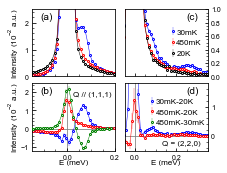

In [142]:
# Export figures: four pannels for (111) and (220)
###################### Fitting parameter for 111 450-30mK data （copied from 3.1）##################
# Fit all the files together
# low and high bounds and initio values for the four peaks: elastic, gap, intermidiate, top
# later you select different some for different files containning different peaks
lbs = np.array([
      [-0.1, -0.01, 0.01, 0],
      [0.0,  0.05, 0.01, 0],
      [0.0,  0.15, 0.01, 0],
      [0.0,  0.2,  0.03, 0]])# amplitude, pos, width, frac
hbs = np.array([
      [0.1,0.01, 0.04, 0.01],
      [0.1,0.08, 0.03, 0.01],
      [0.1,0.20, 0.05, 1],
      [0.1,0.3,  0.05, 1]])
p0s = np.array([
      [-0.012,0,   0.02,0.],
      [0.001,0.07,0.02,0.],
      [0.012,0.18,0.02,0.5],
      [0.001,0.25,0.03,0.5]])
# fit which data
usecols = [15,16,17] # 30mK-450mK data
# fit region for different files
reg = [[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[-0.2,0.4],[0.2,0.4],[-0.2,0.4]]
# Peak idx for the peaks appearing in different files     
id_pk = [[0,1], [0,1], [0,1], [0,1],[0,1], [0,1,2], [3], [0,1,2]]
# nb of peaks contained in different files
nb_pk = [len(item) for item in id_pk]
xfit=np.linspace(-0.2,0.5,700) # x for plot the fit
####################################################################################################

%matplotlib ipympl
%matplotlib ipympl
%matplotlib inline
from scipy import interpolate
from mpl_toolkits.axes_grid.inset_locator import inset_axes
latexify(fig_height=2.6,fig_width=3.15)
legs = ['30mK','450mK','20K','30mK-20K','450mK-20K','450mK-30mK']
cols = ['blue','red','black','blue','red','green']
xlims   = [[-0.15,0.2],     [-0.05,0.35],     [-0.1,0.3],     [-0.1,0.3],     [-0.1,0.3],     [-0.1,0.3],    [-0.1,0.3],      [-0.1,0.3],     [-0.04,0.4]]
ylims0  = [[-0.0,0.025],    [-0.0,0.01],    [-0.05,0.3],    [-0.05,0.3],    [-0.05,0.3],    [-0.05,0.3],   [-0.05,0.3],     [-0.05,0.3],    [-0.03,0.9]]
ylims1  = [[-0.012,0.025],   [-0.005,0.018], [-0.02,0.03],   [-0.02,0.03],   [-0.02,0.03],   [-0.015,0.03], [-0.02,0.03],    [-0.015,0.03],  [-0.005,0.014]]
inxlims = [[0.015, 0.35],  [0.015, 0.3],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35],  [0.015, 0.35], [0.015, 0.35],   [0.015, 0.35],  [0.015, 0.38]]
inylims = [[-0.001, 0.012],[-0.001, 0.015],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.012],[-0.001, 0.01]]

# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
# pylab.rcParams.update(params)

params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'xtick.labelsize':7,
         'ytick.labelsize':7 }
mpl.rcParams.update(params)
shift_e = 0.004

fig, axs = plt.subplots(2,2,sharex='col')#,figsize=(6,6))
texts = ['(a)','(b)','(c)','(d)']
tposs = np.array([[0.1,0.85],[0.1,0.85],[0.75,0.85],[0.75,0.85]])
for idx, i in enumerate([2,3]):
    f = os.path.join(fpath, fnames00[i])
    print(fnames00[i])
    dat = np.genfromtxt(f)
   
    axs[1,idx].axhline(y=0, c='grey', lw=0.8,zorder=0)
    #axs[0,idx].axvline(x=0, c='black', lw=0.8)
    axs[1,idx].axvline(x=0, c='grey', lw=0.8,zorder=0)
    for j in [0,1,2,3,4,5]:
        xye = dat[:,j*3:j*3+3]
        xye = xye[xye[:,2]!=0,:] # remove the data with zero error to avoid spl failure
        x, y, err = xye[:,0]-shift_e, xye[:,1], xye[:,2] # shift -0.005 meV because of elastic line is at finite E
        spl = interpolate.UnivariateSpline(x, y, s=0.0000)
        if j in [0,1,2]:
            lines, _, _ = axs[0,idx].errorbar(x, 100*y, 100*err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white', lw=0.3, label=legs[j])
            axs[0,idx].plot(x, 100*spl(x), ls='-',c=lines.get_color(),lw=0.5)
            if i==None: pass # zoomed inset
                #axins = axs[i,idx].inset_axes([0.55, 0.6, 0.7, 0.6])
                #axins.errorbar(x, y, err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white', lw=1, label=legs[j])
                #axins.plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)
        elif j in [3,4]:
                lines, _, _ = axs[1,idx].errorbar(x, 100*y, 100*err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white',lw=0.3,label=legs[j])
                axs[1,idx].plot(x, 100*spl(x), ls='-',c=lines.get_color(),lw=0.5)
        if (idx== 0 and j==5): # also plot 450-30mK (added minius sign)
            xye = fitReg(xye, (-0.2,0.2))
            x, y, err = xye[:,0]-shift_e, xye[:,1], xye[:,2] # shift -0.005 meV because of elastic line is at finite E
            #print(x,y,err)
            lines, _, _ = axs[1,0].errorbar(x, -100*y, 100*err, fmt='o', ms=2, mec=cols[j], c=cols[j],  mfc='white',lw=0.3,label=legs[j],zorder=9)
            axs[1,0].plot(x, -100*spl(x), ls='-',c=lines.get_color(),lw=0.5)
            
            # Do the fit
            lb = lbs[id_pk[0],:].ravel()
            hb = hbs[id_pk[0],:].ravel()
            p0 = p0s[id_pk[0],:].ravel()
            bounds = [lb, hb]
            N = 2
            
            popt, pcov = curve_fit(lambda x, *p: wrapper_fit_func_PV(x, N, p), x, y, p0=p0,
                                   bounds=bounds, sigma=err, absolute_sigma=True,verbose=0)# if initio value is outside bounds, error
            perr = np.sqrt(np.diag(pcov))
            print(popt,'\n', perr)

#            axs[1,0].plot(xfit, -100*wrapper_fit_func_PV(xfit, N, popt),'-',c=lines.get_color(),lw=0.8,zorder=10)   
#             if N!=1:
#                 for j in np.arange(0,N):
#                     axs[1,0].plot(xfit, -100*pvoigt(xfit,*popt[j*4:(j+1)*4]),'-',lw=0.4)
            
    axs[0,idx].set_yscale('linear', nonposy='clip')
    axs[0,idx].set_ylim(ylims0[idx][0]*100,ylims0[idx][1]*100)
    
    axs[1,idx].set_xlim(xlims[idx])
    axs[1,idx].set_ylim(ylims1[idx][0]*100,ylims1[idx][1]*100)

    axs[1,idx].set_xlabel('E (meV)',labelpad=-0.2)
    #axs[1,idx].tick_params(axis='x', which='minor', bottom=True)
    
    axs[0,idx].minorticks_on()
    axs[1,idx].minorticks_on()

axs[0,0].set_ylabel('Intensity ($10^{-2}$ a.u.)',labelpad=2); axs[0,0].set_yticks([0,1,2]);
axs[1,0].set_ylabel('Intensity ($10^{-2}$ a.u.)',labelpad=-2); axs[0,1].set_yticks([0,0.2,0.4,0.6,0.8,1]);

axs[0,1].legend(loc=[0.45,0.25],frameon=False,handletextpad=-0.6,fontsize=8)
handles,labels = axs[1,0].get_legend_handles_labels()
axs[1,1].legend(handles,labels,loc=[0.2,0.32],frameon=False,handletextpad=-0.6,fontsize=8)

axs[0,1].yaxis.tick_right()
axs[1,1].yaxis.tick_right()
fig.subplots_adjust(wspace=0.12, hspace=0.1)

axs[0,0].text(tposs[0,0],tposs[0,1],texts[0],fontsize=10, transform=axs[0,0].transAxes)
axs[1,0].text(tposs[1,0],tposs[1,1],texts[1],fontsize=10, transform=axs[1,0].transAxes)
axs[0,1].text(tposs[2,0],tposs[2,1],texts[2],fontsize=10, transform=axs[0,1].transAxes)
axs[1,1].text(tposs[3,0],tposs[3,1],texts[3],fontsize=10, transform=axs[1,1].transAxes)

axs[1,0].text(0.5,0.8,'Q // (1,1,1)',fontsize=8, transform=axs[1,0].transAxes)
axs[1,1].text(0.45,0.08,'Q = (2,2,0)',fontsize=8, transform=axs[1,1].transAxes)
fig.savefig(f.replace('.txt','_4subpplots1_fit.pdf'),bbox_inches="tight",pad_inches=0,verbose=True)
plt.show()

## Manipulate Bose corrections

In [133]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib ipympl
%matplotlib ipympl

fidx = 2 # 1:(002), 8:(220)
f = os.path.join(fpath, fnames00[fidx])
ie = np.genfromtxt(f)

figlab=['30mk','450mk','20k']
mcolor=['r','b','k']

fig, axs = plt.subplots(figsize=(9,3),nrows=1,ncols=2)

def bose(hw,T,method): # http://ifit.mccode.org/Treatment.html#mozTocId906474
    if method==0: #['Schofield', 'Boltzmann']
        return np.exp(hw*11.6/T/2)
    elif method==1: #['harmonic','Bader']
        return hw*11.6/T / (1-np.exp(-hw*11.6/T))
    elif method==2:
        return 1./(1-np.exp(-hw*11.6/T))
    else: #'standard'  or 'Frommhold'
        return 2./(1+np.exp(-hw*11.6/T))
    #return 1-np.exp(-11.6*en/t)
    
method =2
def manipulate(x1 = 0.45, x2 = 20, x3 = 0, x4=0.005):#data temperature, bkg temperature, temperature-independent constants bkg, shift E
    global fig, axs
    axs[0].cla() 
    axs[1].cla()
    axs[1].axhline(y=0, c='black', lw=0.8) 
    
    i = 0 # 0：30mK, 1: 450mK
    mask = ie[:,i*3+1]>0. # use logY, so ignor the negative
    ie[:,i*3] = ie[:,i*3] - x4
    axs[0].errorbar(ie[mask,i*3], bose(ie[mask,i*3],x1,method) * (ie[mask,i*3+1]-x3)+x3, yerr=ie[mask,i*3+2], fmt='o',ms=3, label=figlab[i],
                              ecolor=mcolor[i], mec=mcolor[i],mfc='none')
    axs[0].plot(ie[mask,i*3], 1* bose(ie[mask,i*3],x1,method),ls='-',c=mcolor[i],lw=1,label='Bose factor')  
  
    j = 2  
    mask = ie[:,j*3+1]>0.
    ie[:,i*3] = ie[:,i*3] - x4
    axs[0].errorbar(ie[mask,j*3], bose(ie[mask,j*3],x2,method) * (ie[mask,j*3+1]-x3)+x3, yerr=ie[mask,j*3+2], fmt='o',ms=3, label=figlab[j],
                    ecolor=mcolor[j], mec=mcolor[j],mfc='none')
    axs[0].plot(ie[mask,j*3], 1*bose(ie[mask,j*3],x2,method),ls='-',c=mcolor[j],lw=1,label='Bose factor')  
    
    axs[1].errorbar(ie[mask,(i+3)*3], ie[mask,(i+3)*3+1] , yerr=0*ie[mask,(i+3)*3+2], fmt='-o',ms=3)
    axs[1].errorbar(ie[mask,i*3], 
                    bose(ie[mask,i*3],x1,method)*(ie[mask,i*3+1]-x3) - bose(ie[mask,j*3],x2,method)*(ie[mask,j*3+1]-x3), 
                    yerr=0*ie[mask,i*3+2],
                    fmt='-o',ms=3)
    
    #axs[0].set_xlim([-0.2,0.5])    
    axs[1].set_ylim([-0.005,0.02])  
    axs[0].legend(numpoints=1,frameon=False, loc='best')  
    #axs[0].set_yscale('log')
    axs[0].set_xlabel('E (meV)',size=14)
    axs[0].set_ylabel('Intensity (a.u.)',size=14)
    return

interact(manipulate, x1=widgets.FloatSlider(min=-3.,max=3,step=0.01,value=0),
                     x2=widgets.FloatSlider(min=-30,   max=20, step=0.1,value=15),
                     x3=widgets.FloatSlider(min=0,   max=0.001, step=0.0001,value=0),
                     x4=widgets.FloatSlider(min=-0.01,   max=0.01, step=0.001,value=0.000))#,__manual=True) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='x1', max=3.0, min=-3.0, step=0.01), FloatSlider(valu…

<function __main__.manipulate(x1=0.45, x2=20, x3=0, x4=0.005)>

In [141]:
%matplotlib ipympl
shift_e = 0.000
fig, axs = plt.subplots(figsize=(9,3),nrows=1,ncols=2)
i=0
mask = ie[:,i*3]<=0.51
axs[0].errorbar(ie[mask,i*3]-shift_e, ie[mask,i*3+1], yerr=ie[mask,i*3+2], fmt='o',ms=3, label='30mk',
                              ecolor=mcolor[i], mec=mcolor[i],mfc='none')
axs[0].plot(-ie[mask,i*3]+shift_e, ie[mask,i*3+1])

from scipy.interpolate import interp1d
mask = ie[:,i*3]-shift_e<=0.
a1 = ie[mask,i*3:i*3+2]
a2 = np.copy(np.flipud(a1))
a2[:,0] = -a2[:,0]
a3 = np.vstack([a1, a2[1:,:]])

#axs[0].scatter(a3[:,0],a3[:,1])

func = interp1d(a3[:,0],a3[:,1])
axs[1].plot(ie[10:81,i*3], ie[10:81,i*3+1]-func(ie[10:81,i*3]))

#axs[1].plot()
plt.show()
print(ie[:,i*3])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[-0.51 -0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41 -0.4
 -0.39 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33 -0.32 -0.31 -0.3  -0.29 -0.28
 -0.27 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16
 -0.15 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04
 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08
  0.09  0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2
  0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32
  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44
  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56
  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68
  0.69  0.7   0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8
  0.81  0.82  0.83  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92
  0.93  0.94  0.95  0.96  0.97  0.98  0.99  1.  ]


# Cross cut I-Q at (111) at 0 and 0.07meV <a id='cross_cut111'></a>

In [18]:
fpath = r'D:\5_Neutron Scattering\9_Orisis_NdZrO\cuts/'
fname='I-Q*.txt'

fnames1=[] #index for different files
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        fnames1.append(file)

I-Q(1+l,1+l,1-2l)_3temps_unsub_sub_E0meVDq0p2.txt
I-Q(1+l,1+l,1-2l)_3temps_unsub_sub_E0p07meVDq0p2.txt
I-Q(lll)_3temps_unsub_sub_E0meVDq0p2.txt
I-Q(lll)_3temps_unsub_sub_E0p07meVDq0p2.txt


In [75]:
print np.arcsin(0.667)*180/np.pi

41.83594347493772


I-Q(1+l,1+l,1-2l)_3temps_unsub_sub_E0meVDq0p2.txt


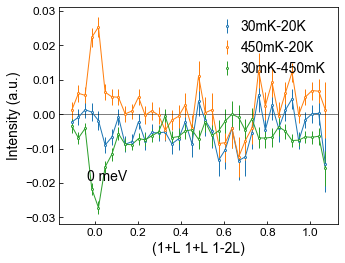

I-Q(1+l,1+l,1-2l)_3temps_unsub_sub_E0p07meVDq0p2.txt


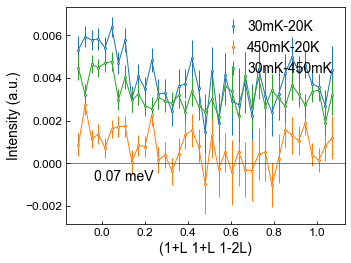

I-Q(lll)_3temps_unsub_sub_E0meVDq0p2.txt


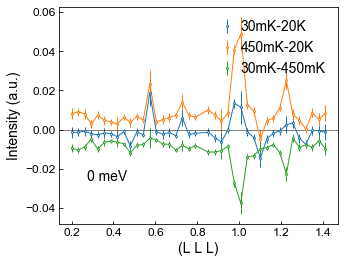

I-Q(lll)_3temps_unsub_sub_E0p07meVDq0p2.txt


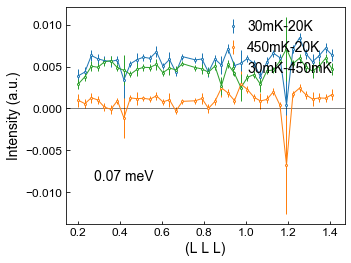

In [22]:
# Export figures
from scipy import interpolate

legs = ['30mK','450mK','20K','30mK-20K','450mK-20K','30mK-450mK']
ylims = [[-0.02,0.03],[-0.02,0.03],[-0.02,0.03],[-0.02,0.03],[-0.02,0.03],[-0.015,0.03],[-0.02,0.03],[-0.015,0.03]]
xlab = ['(1+L 1+L 1-2L)', '(1+L 1+L 1-2L)', '(L L L)', '(L L L)']
energy = ['0 meV', '0.07 meV', '0 meV', '0.07 meV']
for i in [0,1,2,3]:
    f = os.path.join(fpath, fnames1[i])
    print(fnames1[i])
    dat = np.genfromtxt(f)
    
    fig, ax = plt.subplots(1,1, figsize=(5,4),sharex=True,sharey=True)
    ax.text(0.1,0.2,energy[i],fontsize=14, transform=ax.transAxes)
    ax.axhline(y=0, c='black', lw=0.5)
    
    for j in [3,4,5]:
        xye = dat[:,j*3:j*3+3]
        xye = xye[xye[:,2]!=0,:] # remove the data with zero error to avoid spl failure
        x, y, err = xye[:,0],xye[:,1], xye[:,2]
        lines, _, _ = ax.errorbar(x, y, err, fmt='o', ms=2,  mfc='white',lw=1,label=legs[j])
        spl = interpolate.UnivariateSpline(x, y, s=0.0000)
        ax.plot(x, spl(x), ls='-',c=lines.get_color(),lw=1)

    #ax.set_xlim([-0.2,0.4])
    #ax.set_ylim(ylims[i])

    ax.set_xlabel(xlab[i],size=14)
    ax.set_ylabel('Intensity (a.u.)',size=14)

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    plt.legend(loc=1,fontsize=14,frameon=False,handletextpad=0.)
    #fig.savefig(f.replace('.txt','_all.pdf'),bbox_inches="tight",verbose=True)
    plt.show()    